In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite
def X_split(X_train, Y_train):
    x_plus = []
    x_min = []
    for i in range(len(Y_train)):
        if(Y_train[i]==1.0):
            x_plus.append(X_train[i])
        elif(Y_train[i]== -1.0):
            x_min.append(X_train[i])
    
    x_plus = np.reshape(x_plus,(len(x_plus),len(x_plus[0])))
    x_min = np.reshape(x_min,(len(x_min),len(x_min[0])))
    return x_plus,x_min

def norm(X,mu):
    z = X-mu
    norm_ = z @ z.T
    return norm_

def tran(X,mu):
        z = X-mu
        ans = z.T @ z
        return ans
    
def covariance(X_train,mu):
           
    cova = np.zeros((len(X_train[0]),len(X_train[0])))
    for i in range(len(X_train)):        
        cova += tran(X_train[i],mu)
    cova /= len(X_train)
    return cova

def get_inv(X):
    y = np.linalg.inv(X)
    return y

def get_det(X):
    y = np.linalg.det(X)
    return y

def multi(X,mu,sig):
    a = X - mu
    b = a @ get_inv(sig)
    c = b @ a.T
    ans = np.exp(- 0.5 * c)
    return ans

def constt(sigma):
    a = np.sqrt(get_det(sigma))    
    ans = 1/a
    return ans

def eta1a(X,mu_p, mu_m, y):
    ans = y*np.exp(-0.5*norm(X,mu_p))/(y*np.exp(-0.5*norm(X,mu_p)) + (1-y)*np.exp(-0.5*norm(X,mu_m)))
    if ans>0.5:
        return 1.0
    else:
        return -1.0
    
def eta1b(X,mu_p, mu_m,sig, y):
    d = len(X)
    ans = y*multi(X,mu_p,sig)/(y*multi(X,mu_p,sig)+ (1-y)*multi(X,mu_m,sig))
    if ans>0.5:
        return 1.0
    else:
        return -1.0
    
def eta1c(X,mu_p, mu_m,sig_p, sig_m, y):
    d = len(X)
    ans = y*constt(sig_p)*multi(X,mu_p,sig_p)/(y*constt(sig_p)*multi(X,mu_p,sig_p)+ (1-y)*constt(sig_m)*multi(X,mu_m,sig_m))
    if ans>0.5:
        return 1.0
    else:
        return -1.0


def Bayes1a(X_train, Y_train, X_test):
    x_plus,x_min = X_split(X_train, Y_train)  
                
    mu_plus = np.mean(x_plus, axis = 0)    
    mu_min = np.mean(x_min, axis = 0)
    
    mu_plus = np.reshape(mu_plus,(1,len(x_plus[0])))
    mu_min = np.reshape(mu_min,(1,len(x_plus[0])))
    
    y_plus = len(x_plus)/len(Y_train)
    y_min = len(x_min)/len(Y_train)
        
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(eta1a(X_test[i],mu_plus,mu_min,y_plus))
    
    y_pred = np.reshape(y_pred,(len(y_pred),))
    return y_pred
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    
def Bayes1b(X_train, Y_train, X_test):
    x_plus,x_min = X_split(X_train, Y_train)
    
    mu_plus = np.sum(x_plus, axis = 0)/len(x_plus)    
    mu_min = np.sum(x_min, axis = 0)/len(x_min)    
    
    mu_plus = np.reshape(mu_plus,(1,len(x_plus[0])))
    mu_min = np.reshape(mu_min,(1,len(x_plus[0])))
    
    sigma_p = covariance(x_plus,mu_plus)
    sigma_m = covariance(x_min,mu_min)
    
    sig = (sigma_p+sigma_m)/2
    
    y_plus = len(x_plus)/len(Y_train)
    
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(eta1b(X_test[i],mu_plus,mu_min,sig, y_plus))
    
    y_pred = np.reshape(y_pred,(len(y_pred),))
    return y_pred
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

def Bayes1c(X_train, Y_train, X_test):
    x_plus,x_min = X_split(X_train, Y_train)
    
    mu_plus = np.sum(x_plus, axis = 0)/len(x_plus)    
    mu_min = np.sum(x_min, axis = 0)/len(x_min)    
    
    mu_plus = np.reshape(mu_plus,(1,len(x_plus[0])))
    mu_min = np.reshape(mu_min,(1,len(x_plus[0])))
    
    sigma_p = covariance(x_plus,mu_plus)
    sigma_m = covariance(x_min,mu_min)
    
    y_plus = len(x_plus)/len(Y_train)
    
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(eta1c(X_test[i],mu_plus,mu_min,sigma_p, sigma_m, y_plus))
    
    y_pred = np.reshape(y_pred,(len(y_pred),))
    return y_pred
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    
    




In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

def confusion_mat(y_true, y_pred):
    tp,fp,fn,tn = 0,0,0,0
    for i in range(len(y_pred)):
        if y_pred[i]==1.0 and y_true[i]==1.0:
            tp+=1
        elif y_pred[i]==1.0 and y_true[i]==-1.0:
            fp+=1
        elif y_pred[i]==-1.0 and y_true[i]==1.0:
            fn+=1
        elif y_pred[i]==-1.0 and y_true[i]==-1.0:
            tn+=1
    n = len(np.unique(y_true))
    mat = np.reshape([tp, fn, fp, tn],(n,n))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    #print(accuracy)
    return mat

ans1 = confusion_mat(Y_test,Y_pred_test_1a)
ans2 = confusion_mat(Y_test,Y_pred_test_1b)
ans3 = confusion_mat(Y_test,Y_pred_test_1c)



**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


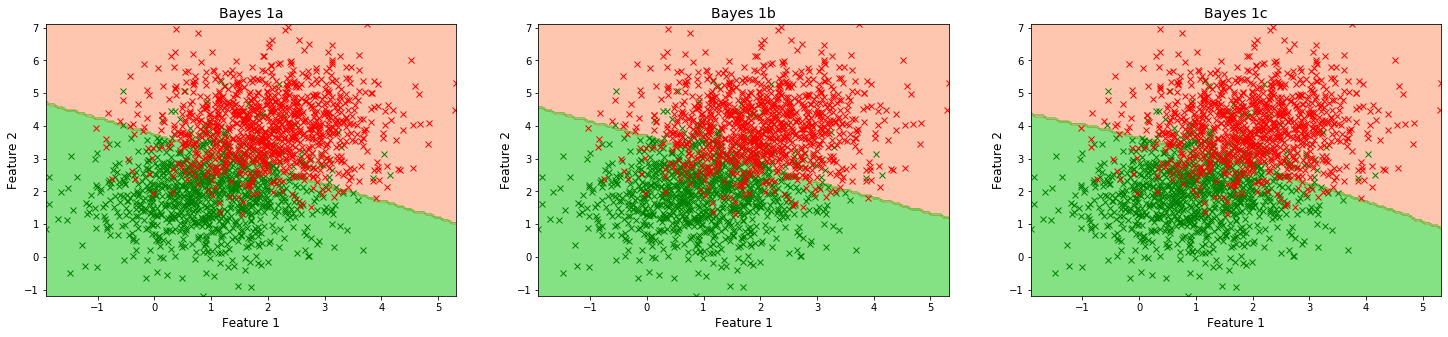

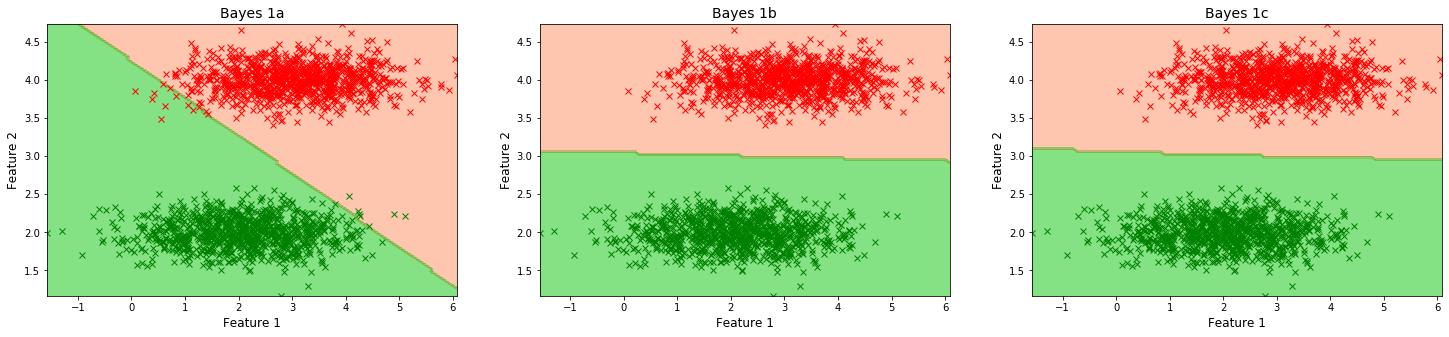

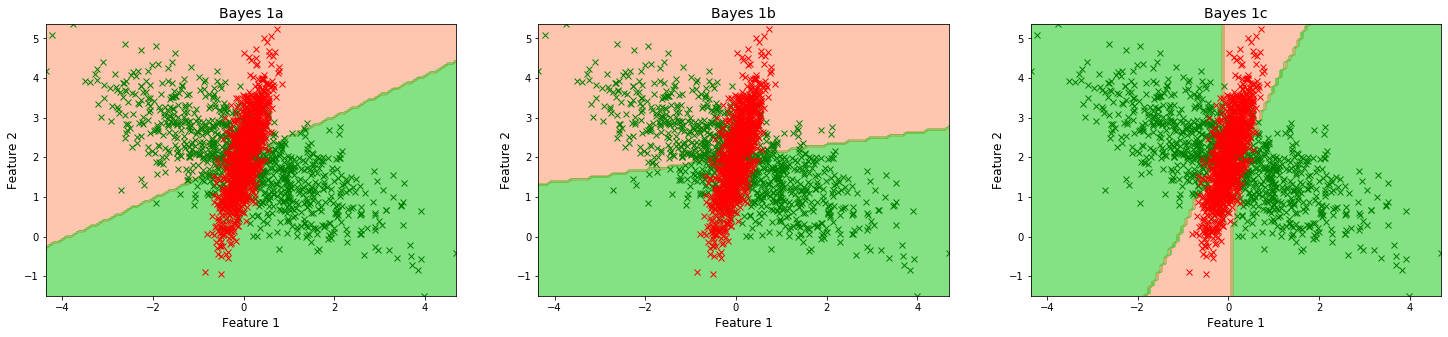

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data1 = np.load('../../Data/dataset1_1.npz')
data2 = np.load('../../Data/dataset1_2.npz')
data3 = np.load('../../Data/dataset1_3.npz')
X_train_1, Y_train_1, X_test_1, Y_test_1 = data1['arr_0'], data1['arr_1'], data1['arr_2'], data1['arr_3']
X_train_2, Y_train_2, X_test_2, Y_test_2 = data2['arr_0'], data2['arr_1'], data2['arr_2'], data2['arr_3']
X_train_3, Y_train_3, X_test_3, Y_test_3 = data3['arr_0'], data3['arr_1'], data3['arr_2'], data3['arr_3']

Y_pred_test_1_1a = Bayes1a(X_train_1, Y_train_1, X_test_1)
Y_pred_test_1_1b = Bayes1b(X_train_1, Y_train_1, X_test_1)
Y_pred_test_1_1c = Bayes1c(X_train_1, Y_train_1, X_test_1)

Y_pred_test_2_1a = Bayes1a(X_train_2, Y_train_2, X_test_2)
Y_pred_test_2_1b = Bayes1b(X_train_2, Y_train_2, X_test_2)
Y_pred_test_2_1c = Bayes1c(X_train_2, Y_train_2, X_test_2)

Y_pred_test_3_1a = Bayes1a(X_train_3, Y_train_3, X_test_3)
Y_pred_test_3_1b = Bayes1b(X_train_3, Y_train_3, X_test_3)
Y_pred_test_3_1c = Bayes1c(X_train_3, Y_train_3, X_test_3)

ans1 = confusion_mat(Y_test_1,Y_pred_test_1_1a)
ans2 = confusion_mat(Y_test_1,Y_pred_test_1_1b)
ans3 = confusion_mat(Y_test_1,Y_pred_test_1_1c)
#print(ans1)
#print(ans2)
#print(ans3)

ans1 = confusion_mat(Y_test_2,Y_pred_test_2_1a)
ans2 = confusion_mat(Y_test_2,Y_pred_test_2_1b)
ans3 = confusion_mat(Y_test_2,Y_pred_test_2_1c)
#print(ans1)
#print(ans2)
#print(ans3)

ans1 = confusion_mat(Y_test_3,Y_pred_test_3_1a)
ans2 = confusion_mat(Y_test_3,Y_pred_test_3_1b)
ans3 = confusion_mat(Y_test_3,Y_pred_test_3_1c)
#print(ans1)
#print(ans2)
#print(ans3)

def contour_plot(X_train,Y_train):
    X1,X2 = X_train[:,0],X_train[:,1]
    low1, high1 = min(X1), max(X1)
    low2, high2 = min(X2), max(X2)
    Y1 = np.linspace(low1,high1,100)
    Y2 = np.linspace(low2,high2,100)
    X,Y = np.meshgrid(Y1, Y2)
    iters = 100
    sample = []
    for i in range(iters):
        for j in range(iters):
            sample.append((Y1[i],Y2[j]))
            
    sample = np.array(sample)
    Z1 = Bayes1a(X_train, Y_train, sample)
    Z2 = Bayes1b(X_train, Y_train, sample)
    Z3 = Bayes1c(X_train, Y_train, sample)    
    
    
    x_plus, x_min = X_split(X_train, Y_train)
    ax[0].set_title("Bayes 1a", fontsize=14)
    ax[0].set_xlabel("Feature 1",fontsize=12)
    ax[0].set_ylabel("Feature 2",fontsize=12)
    Z1 = np.reshape(Z1,(len(Z1),1))
    Z1 = np.reshape(Z1,X.shape)
    
    Z2 = np.reshape(Z2,(len(Z2),1))
    Z2 = np.reshape(Z2,X.shape)
    
    Z3 = np.reshape(Z3,(len(Z3),1))
    Z3 = np.reshape(Z3,X.shape)
    
    ax[0].contourf(X, Y, Z1.T, colors=['lightsalmon','limegreen'], alpha=0.6)
    ax[0].plot(x_plus[:,0], x_plus[:,1],'gx')
    ax[0].plot(x_min[:,0], x_min[:,1],'rx')
    
    ax[1].set_title("Bayes 1b", fontsize=14)
    ax[1].set_xlabel("Feature 1",fontsize=12)
    ax[1].set_ylabel("Feature 2",fontsize=12)
    ax[1].contourf(X, Y, Z2.T, colors=['lightsalmon','limegreen'], alpha=0.6)
    ax[1].plot(x_plus[:,0], x_plus[:,1],'gx')
    ax[1].plot(x_min[:,0], x_min[:,1],'rx')
    
    ax[2].set_title("Bayes 1c", fontsize=14)
    ax[2].set_xlabel("Feature 1",fontsize=12)
    ax[2].set_ylabel("Feature 2",fontsize=12)
    ax[2].contourf(X, Y, Z3.T, colors=['lightsalmon','limegreen'], alpha=0.6)
    ax[2].plot(x_plus[:,0], x_plus[:,1],'gx')
    ax[2].plot(x_min[:,0], x_min[:,1],'rx')
    

fig, ax = plt.subplots(1, 3, figsize = (25, 5))
contour_plot(X_train_1, Y_train_1)
fig, ax = plt.subplots(1, 3, figsize = (25, 5))
contour_plot(X_train_2, Y_train_2)
fig, ax = plt.subplots(1, 3, figsize = (25, 5))
contour_plot(X_train_3, Y_train_3)



** Cell type : TextWrite ** 
(Write your observations and table of errors here)

Dataset1_1


After classifying using Bayes with Bayes1a


Confusion Matrix: 

                   true\pred    1      -1
                     1       862      138                  
                    -1       114      886                    
                    
                 Accuracy = 87.4%
                 

After classifying using Bayes with Bayes1b 


Confusion Matrix: 

                  true\pred   1     -1
                     1       865    135                    
                    -1       114    886
                    
                    
                 Accuracy = 87.55%
                 

After classifying using Bayes with Bayes1c


Confusion Matrix: 

                  true\pred   1      -1
                     1       862    138                   
                    -1       111    889                    
                    
                 Accuracy = 87.55%
                 

Dataset1_2


After classifying using Bayes with Bayes1a


Confusion Matrix:

                  true\pred   1     -1
                     1       993     7
                    -1        10    990                    
                    
                 Accuracy = 99.15%
                 

After classifying using Bayes with Bayes1b


Confusion Matrix: 
                  true\pred   1     -1
                     1       1000    0                     
                    -1        0     1000                    
                    
                 Accuracy = 100%
                 


After classifying using Bayes with Bayes1c


Confusion Matrix:

                   true\pred   1     -1
                     1       1000     0                    
                    -1        0     1000                    
                    
                 Accuracy = 100%
                 

Dataset1_3


After classifying using Bayes with Bayes1a 


Confusion Matrix: 

                  true\pred   1     -1
                     1       487    513                    
                    -1       481    519                    
                    
                 Accuracy = 50.3%
                 

After classifying using Bayes with Bayes1b 


Confusion Matrix: 

                  true\pred   1     -1
                     1       496    504                     
                    -1       486    514                    
                    
                 Accuracy = 50.5%
                 

After classifying using Bayes with Bayes1c


Confusion Matrix:

                   true\pred   1     -1
                     1       779     221                     
                    -1        49     951                    
                    
                 Accuracy = 86.5%
                 
**Error rate**

                     Bayes1a         Bayes1b         Bayes1c
     Dataset1_1       0.126           0.1245         0.1245
     Dataset1_b       0.0085          0.0            0.0
     Dataset1_c       0.497           0.495          0.135


Observation: 

    1) Bayes1c classifier is the best. Here, we do not assume anything. Mean of the data and Covariance matrix for class '1' and class  '-1' are determined and then classifier is trained. So, it classifies the test data more accurately than Bayes1a and Bayes1b.

    2) Bayes1b classifier assumes that the covariance for the class '1' and class '-1' are same, which is not at all necessary in real world dataset. But it is better than Bayes1a beacuse Bayes1a assumes covariance matrix as identity, which is very rare or impossible in practical application for classification. Thus, it is the least accurate bayes classifier.
    
    3) In Bayes1c, it forms non-linear decision boundary so it can classify the data more accurately. Hence, it is the best accurate bayes classifier.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

#Loss Matrix
loss = [[0.0, 1.0, 2.0, 3.0],[1.0, 0., 1., 2.], [2., 1., 0., 1.], [3., 2., 1., 0.]]
loss = np.resize(loss,(4,4))

def Xsplit(X_train, Y_train):
    x_1 = []
    x_2 = []
    x_3 = []
    x_4 = []
    for i in range(len(Y_train)):
        if(Y_train[i]==1.0):
            x_1.append(X_train[i])
        elif(Y_train[i]== 2.0):
            x_2.append(X_train[i])
        elif(Y_train[i]== 3.0):
            x_3.append(X_train[i])
        elif(Y_train[i]== 4.0):
            x_4.append(X_train[i])
    
    x_1 = np.reshape(x_1,(len(x_1),len(x_1[0])))
    x_2 = np.reshape(x_2,(len(x_2),len(x_2[0])))
    x_3 = np.reshape(x_3,(len(x_3),len(x_3[0])))
    x_4 = np.reshape(x_4,(len(x_4),len(x_4[0])))
    return x_1,x_2,x_3,x_4

def multi2a(X,mu):
    a = X - mu    
    c = a @ a.T
    ans = np.exp(- 0.5 * c)
    return ans 

def eta2a(X,mu1,mu2,mu3,mu4,y1,y2,y3,y4):
    E1 = y1 * multi2a(X,mu1)
    E2 = y2 * multi2a(X,mu2)
    E3 = y3 * multi2a(X,mu3)
    E4 = y4 * multi2a(X,mu4)
    l = [E1, E2, E3, E4]
    l = np.reshape(l,(1,4))
    
    x = l @ loss    
    ind = 0
    m = np.argmin(x, axis = 1)
    ind = m[0]+1
    
    return ind

def Bayes2a(X_train, Y_train, X_test):
    x1,x2,x3,x4 = Xsplit(X_train,Y_train)
        
    mu1 = np.mean(x1, axis = 0)    
    mu2 = np.mean(x2, axis = 0)
    mu3 = np.mean(x3, axis = 0)    
    mu4 = np.mean(x4, axis = 0)
      
    mu1 = np.reshape(mu1,(1,len(x1[0])))
    mu2 = np.reshape(mu2,(1,len(x1[0])))
    mu3 = np.reshape(mu3,(1,len(x1[0])))
    mu4 = np.reshape(mu4,(1,len(x1[0])))
          
    y1 = len(x1)/len(Y_train)
    y2 = len(x2)/len(Y_train)
    y3 = len(x3)/len(Y_train)
    y4 = len(x4)/len(Y_train)
    
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(eta2a(X_test[i],mu1,mu2,mu3,mu4,y1, y2, y3, y4))
    
    y_pred = np.reshape(y_pred,(len(y_pred),))
    return y_pred

    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """


def eta2b(X,mu1,mu2,mu3,mu4,y1,y2,y3,y4,sigma):
    E1 = y1 * multi(X,mu1,sigma)
    E2 = y2 * multi(X,mu2,sigma)
    E3 = y3 * multi(X,mu3,sigma)
    E4 = y4 * multi(X,mu4,sigma)
    l = [E1, E2, E3, E4]
    l = np.reshape(l,(1,4))
    
    x = l @ loss    
    ind = 0
    m = np.argmin(x, axis = 1)
    ind = m[0]+1
    return ind

def Bayes2b(X_train, Y_train, X_test):
    x1,x2,x3,x4 = Xsplit(X_train,Y_train)
        
    mu1 = np.mean(x1, axis = 0)    
    mu2 = np.mean(x2, axis = 0)
    mu3 = np.mean(x3, axis = 0)    
    mu4 = np.mean(x4, axis = 0)
    
    mu1 = np.reshape(mu1,(1,len(x1[0])))
    mu2 = np.reshape(mu2,(1,len(x1[0])))
    mu3 = np.reshape(mu3,(1,len(x1[0])))
    mu4 = np.reshape(mu4,(1,len(x1[0])))
        
    y1 = len(x1)/len(Y_train)
    y2 = len(x2)/len(Y_train)
    y3 = len(x3)/len(Y_train)
    y4 = len(x4)/len(Y_train)
    
    sigma1 = covariance(x1,mu1)
    sigma2 = covariance(x2,mu2)
    sigma3 = covariance(x3,mu3)
    sigma4 = covariance(x4,mu4)
    
    sig = (sigma1 + sigma2 + sigma3 + sigma4)/4
    #print(sig)
    
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(eta2b(X_test[i],mu1,mu2,mu3,mu4,y1, y2, y3, y4,sig))
    
    y_pred = np.reshape(y_pred,(len(y_pred),))
    return y_pred
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

def eta2c(X,mu1,mu2,mu3,mu4,y1,y2,y3,y4,sigma1,sigma2,sigma3,sigma4):    
    E1 = y1 * constt(sigma1) * multi(X,mu1,sigma1)
    E2 = y2 * constt(sigma2) * multi(X,mu2,sigma2)
    E3 = y3 * constt(sigma3) * multi(X,mu3,sigma3)
    E4 = y4 * constt(sigma4) * multi(X,mu4,sigma4)
    l = [E1, E2, E3, E4]
    l = np.reshape(l,(1,4))
        
    x = l @ loss    
    ind = 0
    m = np.argmin(x, axis = 1)
    ind = m[0]+1
    return ind

def Bayes2c(X_train, Y_train, X_test):
    x1,x2,x3,x4 = Xsplit(X_train,Y_train)
        
    mu1 = np.mean(x1, axis = 0)    
    mu2 = np.mean(x2, axis = 0)
    mu3 = np.mean(x3, axis = 0)    
    mu4 = np.mean(x4, axis = 0)
    
    mu1 = np.reshape(mu1,(1,len(x1[0])))
    mu2 = np.reshape(mu2,(1,len(x1[0])))
    mu3 = np.reshape(mu3,(1,len(x1[0])))
    mu4 = np.reshape(mu4,(1,len(x1[0])))
        
    y1 = len(x1)/len(Y_train)
    y2 = len(x2)/len(Y_train)
    y3 = len(x3)/len(Y_train)
    y4 = len(x4)/len(Y_train)
    
    sigma1 = covariance(x1,mu1)
    sigma2 = covariance(x2,mu2)
    sigma3 = covariance(x3,mu3)
    sigma4 = covariance(x4,mu4)
    
    y_pred = []
    for i in range(len(X_test)):
        y_pred.append(eta2c(X_test[i],mu1,mu2,mu3,mu4,y1, y2, y3, y4,sigma1,sigma2,sigma3,sigma4))
    
    y_pred = np.reshape(y_pred,(len(y_pred),))
    return y_pred

    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

    
    


    


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

def confu(y_pred,y_true):
    mat = np.zeros((4,4))
    err_rate = 0.
    for i in range(len(y_true)):
        if y_pred[i] ==1.0 and y_true[i]==1.0:
            mat[0][0] +=1
        elif y_pred[i] ==1. and y_true[i]==2.:
            mat[1][0]+=1
        elif y_pred[i] ==1. and y_true[i]==3.:
            mat[2][0]+=1
        elif y_pred[i] ==1. and y_true[i]==4.:
            mat[3][0]+=1
        elif y_pred[i] ==2. and y_true[i]==1.:
            mat[0][1]+=1
        elif y_pred[i] ==2. and y_true[i]==2.:
            mat[1][1]+=1
        elif y_pred[i] ==2. and y_true[i]==3.:
            mat[2][1]+=1
        elif y_pred[i] ==2. and y_true[i]==4.:
            mat[3][1]+=1
        elif y_pred[i] ==3. and y_true[i]==1.:
            mat[0][2]+=1
        elif y_pred[i] ==3. and y_true[i]==2.:
            mat[1][2]+=1
        elif y_pred[i] ==3. and y_true[i]==3.:
            mat[2][2]+=1
        elif y_pred[i] ==3. and y_true[i]==4.:
            mat[3][2]+=1
        elif y_pred[i] ==4. and y_true[i]==1.:
            mat[0][3]+=1
        elif y_pred[i] ==4. and y_true[i]==2.:
            mat[1][3]+=1
        elif y_pred[i] ==4. and y_true[i]==3.:
            mat[2][3]+=1
        elif y_pred[i] ==4. and y_true[i]==4.:
            mat[3][3]+=1
    
    mat /= len(y_true)
    return mat

def acc(confu2a):
    accuracy = 0.0
    for i in range(4):
        accuracy += confu2a[i][i]
    sum1 = np.sum(confu2a)
    accuracy /= sum1
    return accuracy

def expected_loss(confusion_mat,loss):
    c = confusion_mat*loss
    c = np.sum(c)
    return c
ans2a = confu(Y_pred_test_2a, Y_test)
ans2b = confu(Y_pred_test_2b, Y_test)
ans2c = confu(Y_pred_test_2c, Y_test)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


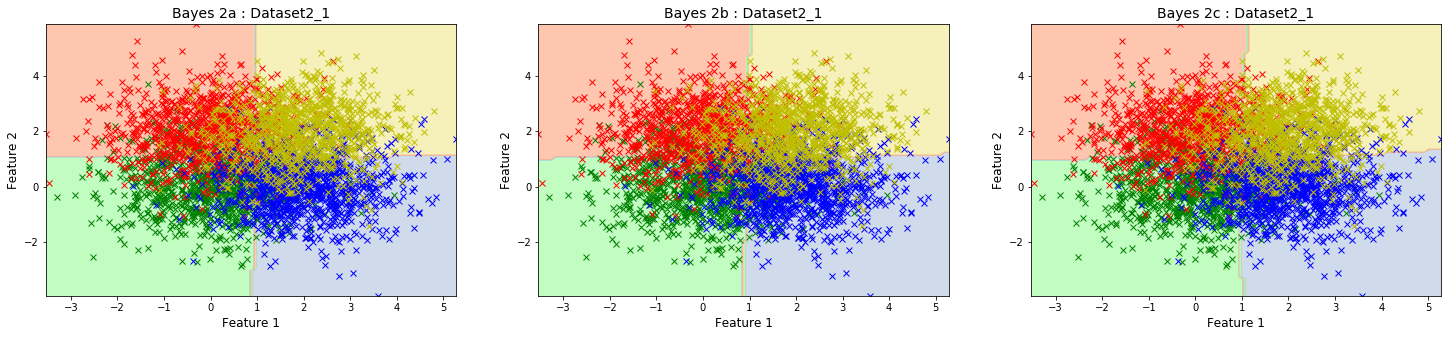

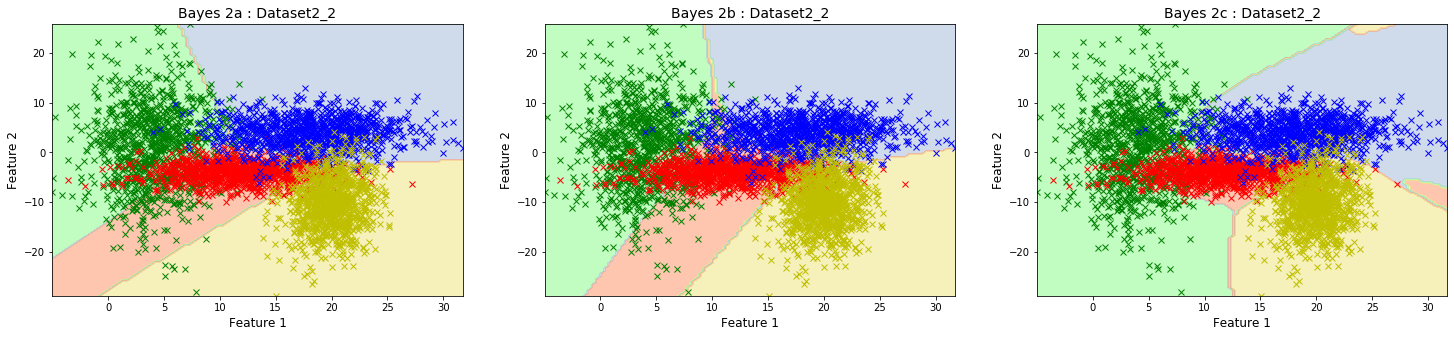

In [8]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data1 = np.load('../../Data/dataset2_1.npz')
data2 = np.load('../../Data/dataset2_2.npz')

X_train_1, Y_train_1, X_test_1, Y_test_1 = data1['arr_0'], data1['arr_1'], data1['arr_2'], data1['arr_3']
X_train_2, Y_train_2, X_test_2, Y_test_2 = data2['arr_0'], data2['arr_1'], data2['arr_2'], data2['arr_3']

Y_pred_test_1_1a = Bayes2a(X_train_1, Y_train_1, X_test_1)
Y_pred_test_1_1b = Bayes2b(X_train_1, Y_train_1, X_test_1)
Y_pred_test_1_1c = Bayes2c(X_train_1, Y_train_1, X_test_1)

Y_pred_test_2_1a = Bayes2a(X_train_2, Y_train_2, X_test_2)
Y_pred_test_2_1b = Bayes2b(X_train_2, Y_train_2, X_test_2)
Y_pred_test_2_1c = Bayes2c(X_train_2, Y_train_2, X_test_2)

ans1 = confu(Y_pred_test_1_1a, Y_test_1)
ans2 = confu(Y_pred_test_1_1b, Y_test_1)
ans3 = confu(Y_pred_test_1_1c, Y_test_1)
'''print(ans1)
print(expected_loss(ans1,loss))
print(ans2)
print(expected_loss(ans2,loss))
print(ans3)
print(expected_loss(ans3,loss))'''

ans1 = confu(Y_test_2,Y_pred_test_2_1a)
ans2 = confu(Y_test_2,Y_pred_test_2_1b)
ans3 = confu(Y_test_2,Y_pred_test_2_1c)
'''print(ans1)
print(expected_loss(ans1,loss))
print(ans2)
print(expected_loss(ans2,loss))
print(ans3)
print(expected_loss(ans3,loss))'''

def contour_plot(X_train,Y_train,str):
    X1,X2 = X_train[:,0],X_train[:,1]
    low1, high1 = min(X1), max(X1)
    low2, high2 = min(X2), max(X2)
    Y1 = np.linspace(low1,high1,100)
    Y2 = np.linspace(low2,high2,100)
    X,Y = np.meshgrid(Y1, Y2)
    iters = 100
    sample = []
    for i in range(iters):
        for j in range(iters):
            sample.append((Y1[i],Y2[j]))
            
    sample = np.array(sample)
    Z1 = Bayes2a(X_train, Y_train, sample)
    Z2 = Bayes2b(X_train, Y_train, sample)
    Z3 = Bayes2c(X_train, Y_train, sample)    
    
    
    x_1, x_2, x_3, x_4 = Xsplit(X_train, Y_train)
    ax[0].set_title(f"Bayes 2a : {str}", fontsize=14)
    ax[0].set_xlabel("Feature 1",fontsize=12)
    ax[0].set_ylabel("Feature 2",fontsize=12)
    Z1 = np.reshape(Z1,(len(Z1),1))
    Z1 = np.reshape(Z1,X.shape)
    
    Z2 = np.reshape(Z2,(len(Z2),1))
    Z2 = np.reshape(Z2,X.shape)
    
    Z3 = np.reshape(Z3,(len(Z3),1))
    Z3 = np.reshape(Z3,X.shape)
    
    ax[0].contourf(X, Y, Z1.T, colors=['palegreen','lightsteelblue','lightsalmon','khaki'], alpha=0.6)
    ax[0].plot(x_1[:,0], x_1[:,1],'gx')
    ax[0].plot(x_2[:,0], x_2[:,1],'rx')
    ax[0].plot(x_3[:,0], x_3[:,1],'bx')
    ax[0].plot(x_4[:,0], x_4[:,1],'yx')
    
    
    ax[1].set_title(f"Bayes 2b : {str}", fontsize=14)
    ax[1].set_xlabel("Feature 1",fontsize=12)
    ax[1].set_ylabel("Feature 2",fontsize=12)
    ax[1].contourf(X, Y, Z2.T, colors=['palegreen','lightsteelblue','lightsalmon','khaki'], alpha=0.6)
    ax[1].plot(x_1[:,0], x_1[:,1],'gx')
    ax[1].plot(x_2[:,0], x_2[:,1],'rx')
    ax[1].plot(x_3[:,0], x_3[:,1],'bx')
    ax[1].plot(x_4[:,0], x_4[:,1],'yx')
    
    ax[2].set_title(f"Bayes 2c : {str}", fontsize=14)
    ax[2].set_xlabel("Feature 1",fontsize=12)
    ax[2].set_ylabel("Feature 2",fontsize=12)
    ax[2].contourf(X, Y, Z3.T, colors=['palegreen','lightsteelblue','lightsalmon','khaki'], alpha=0.6)
    ax[2].plot(x_1[:,0], x_1[:,1],'gx')
    ax[2].plot(x_2[:,0], x_2[:,1],'rx')
    ax[2].plot(x_3[:,0], x_3[:,1],'bx')
    ax[2].plot(x_4[:,0], x_4[:,1],'yx')
    

fig, ax = plt.subplots(1, 3, figsize = (25, 5))
contour_plot(X_train_1, Y_train_1, "Dataset2_1")
fig, ax = plt.subplots(1, 3, figsize = (25, 5))
contour_plot(X_train_2, Y_train_2, "Dataset2_2")


**Dataset2_1**

After classifying using Bayes with Bayes2a

Confusion Matrix:

               true\pred    1         2       3       4
                 1       0.15825   0.05475  0.034    0.003  
                 2       0.02425   0.1845   0.0155   0.02575
                 3       0.0215    0.01225  0.1925   0.02375
                 4       0.00375   0.034    0.0485   0.16375                  

             
After classifying using Bayes with Bayes2b

Confusion Matrix:

               true\pred    1         2       3         4
                 1       0.15825    0.0545   0.03425  0.003  
                 2       0.02375    0.18575  0.015    0.0255
                 3       0.021      0.01225  0.19325  0.0235
                 4       0.004      0.03425  0.049    0.16275  


After classifying using Bayes with Bayes2c

Confusion Matrix:

              true\pred    1         2        3         4
                 1       0.1585    0.05425  0.0345   0.00275
                 2       0.02475   0.1855   0.01525  0.0245 
                 3       0.02175   0.01175  0.193    0.0235
                 4       0.00375   0.0335   0.05025  0.1625 

**Dataset2_2**

After classifying using Bayes with Bayes2a

Confusion Matrix:

               true\pred    1         2          3        4
                 1        0.2075    0.02325   0.0075      0.
                 2        0.0375    0.196     0.01525    0.00575
                 3        0.0045    0.0115    0.22625    0.0195 
                 4        0.0005    0.01925   0.001      0.22475
                 
After classifying using Bayes with Bayes2b

Confusion Matrix:

                true\pred    1         2          3        4
                    1      0.22275   0.02975    0.00575    0.     
                    2      0.0265    0.17275    0.0265    0.00125
                    3      0.00075   0.031      0.216     0.0255 
                    4        0.      0.0165     0.00175   0.22325
                    
After classifying using Bayes with Bayes2c

Confusion Matrix:                   

                true\pred    1          2          3        4
                     1     0.22525    0.016     0.00475     0.
                     2      0.02      0.206     0.00775    0.009  
                     3     0.00475    0.0115    0.234      0.012 
                     4        0.      0.0165    0.0035     0.229
                     
**Expected Loss**

                 Dataset\Classifier           Bayes2a                   Bayes2b                Bayes2c
                     Dataset2_1         0.42974999999999997       0.42900000000000005          0.42775
                     Dataset2_2                0.1835                    0.1895                0.14075


**Observations**

             1) Bayes2c is the best classifier among given three. Here, for every class 'k', Mean and covariance matrix is     determined, and the classifier is trained. So, it has the minimum loss for both the dataset.
           
             2) Bayes2a is the least accurate classifier among the given three as it assumes covariance matrix as identity   for every class, which is not at all necessary and thus very low chance of holding true in real world datasets. 

             3) Bayes2b is better than Bayes2a as its assumption is better regarding covariance matrix. Since it assumes     covariance matrix to be same rather than identity, it classifies better than Bayes2a.
             
             4) Bayes2c is capable of forming complex decision boundaries i.e. non-linear (hyperquadric) and thus classifies the data points more accurately.
             
             5) Bayes2a assumes covariance matrix as identity and Bayes2b assumes covariance matrix same, so they aren't capable of classifying data points that are not linearly separable. 

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




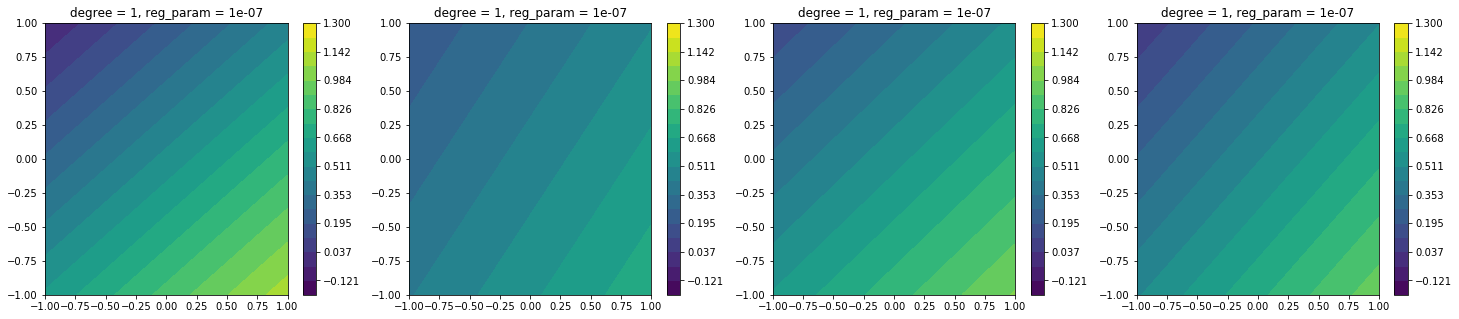

Degree= 1 lambda= 1e-07
Bias = 0.23502553964427328
Variance = 0.0038075678553827104
MSE = 0.059044572140464574


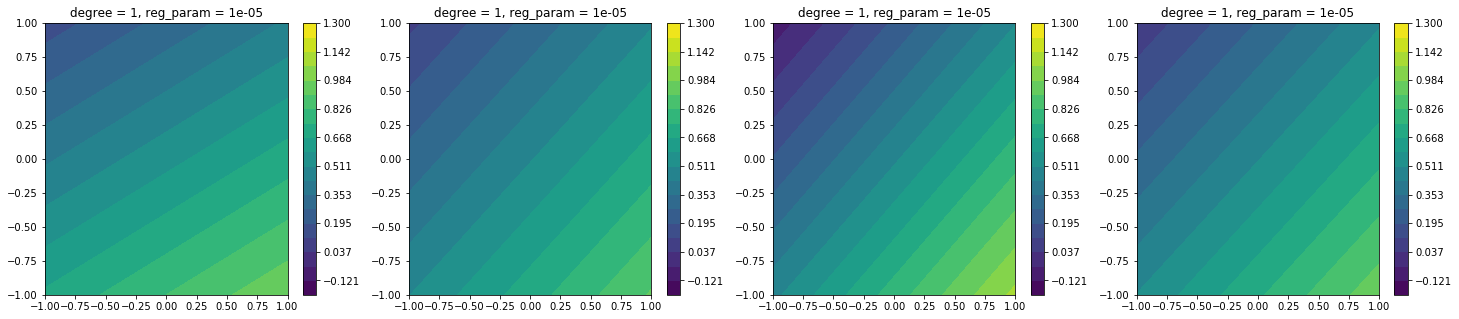

Degree= 1 lambda= 1e-05
Bias = 0.23514289978109668
Variance = 0.004601178128259475
MSE = 0.059893361445722354


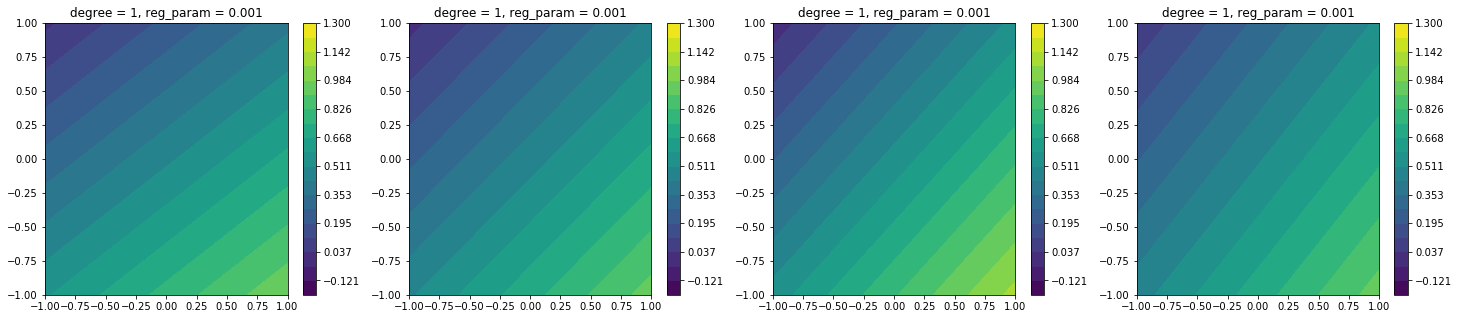

Degree= 1 lambda= 0.001
Bias = 0.23506212617489006
Variance = 0.004170739949291458
MSE = 0.059424943111151395


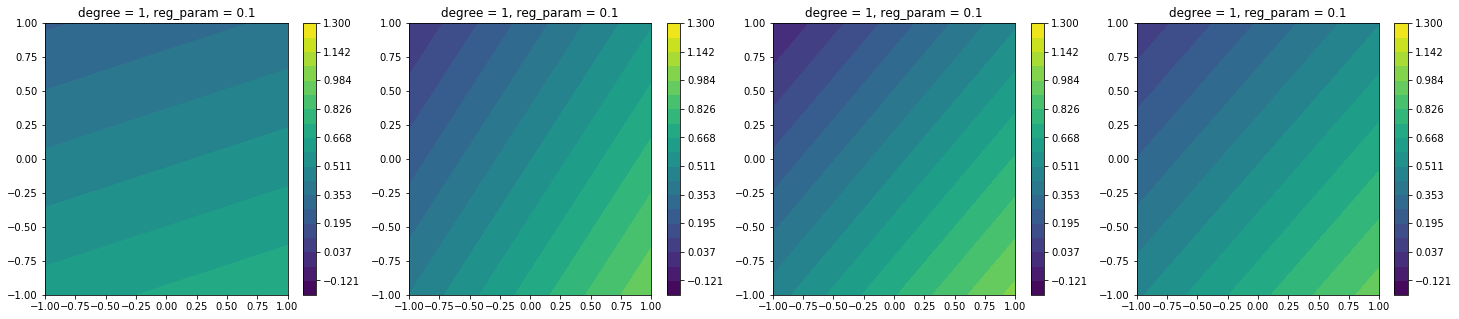

Degree= 1 lambda= 0.1
Bias = 0.2348920160983641
Variance = 0.004062902663091494
MSE = 0.05923716188984564


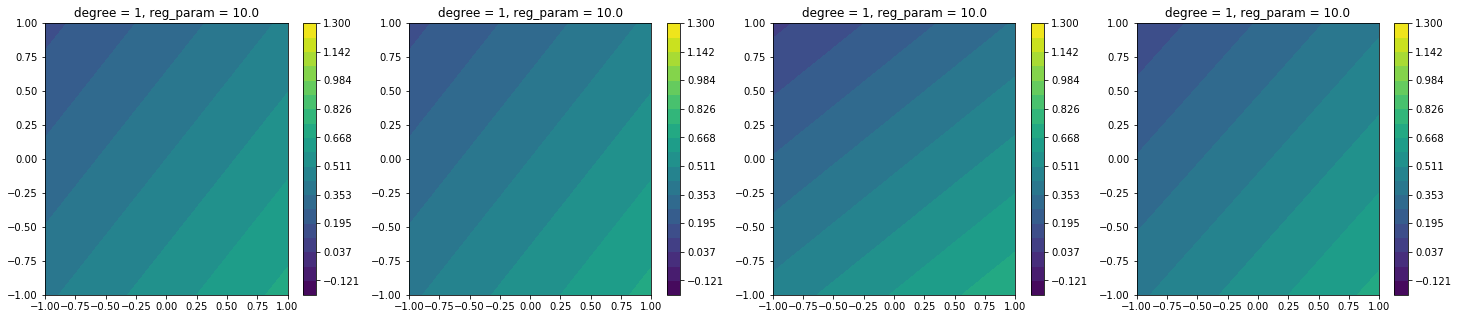

Degree= 1 lambda= 10.0
Bias = 0.2555727576455084
Variance = 0.0018241753408642066
MSE = 0.067141609791394


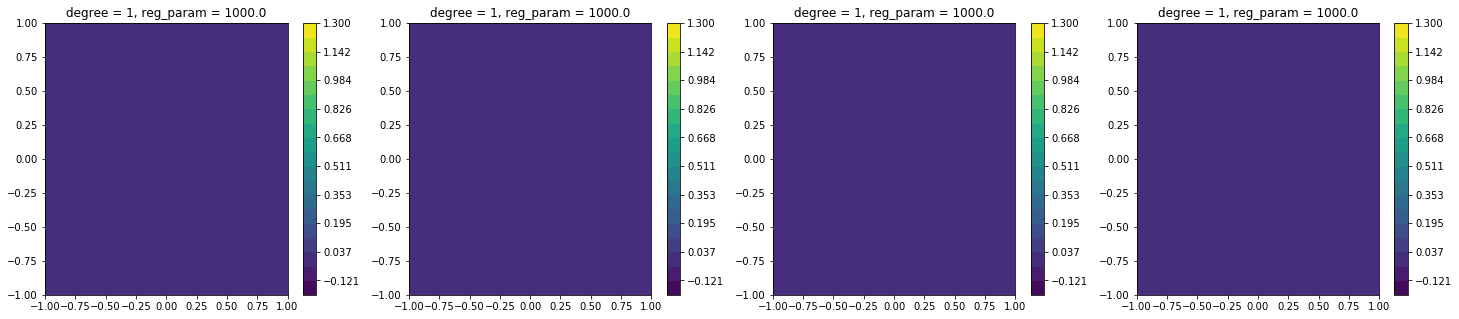

Degree= 1 lambda= 1000.0
Bias = 0.5547960591411689
Variance = 5.625373475492715e-06
MSE = 0.30780429261204684


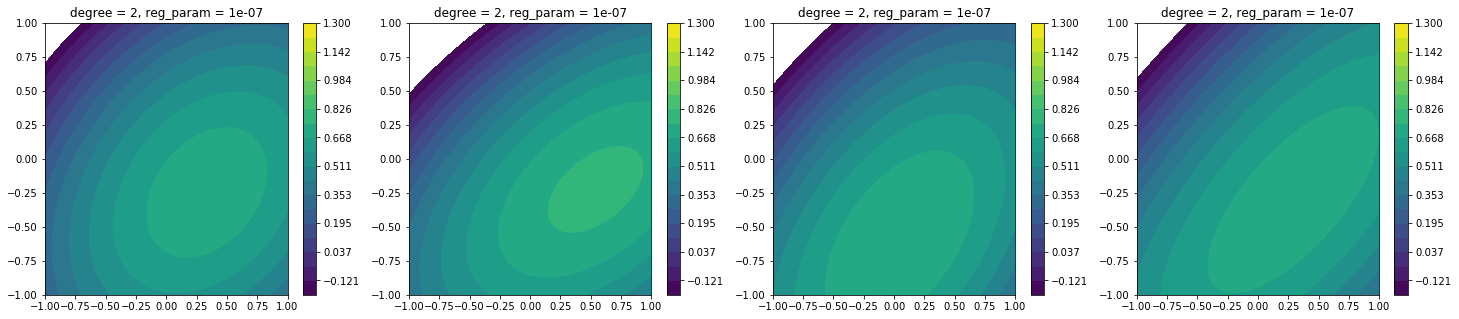

Degree= 2 lambda= 1e-07
Bias = 0.18663365056916892
Variance = 0.006117420040291187
MSE = 0.04094953956506583


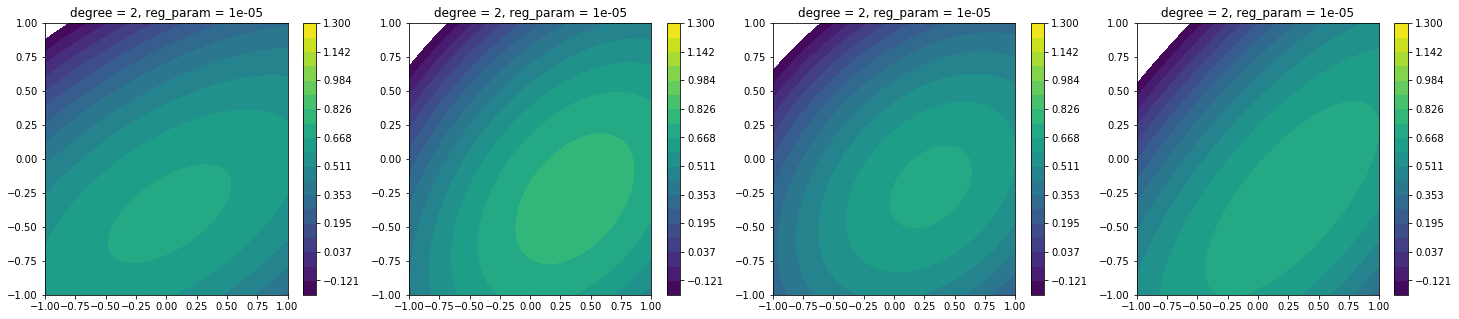

Degree= 2 lambda= 1e-05
Bias = 0.18721859012333547
Variance = 0.005637141935763752
MSE = 0.040687942423533234


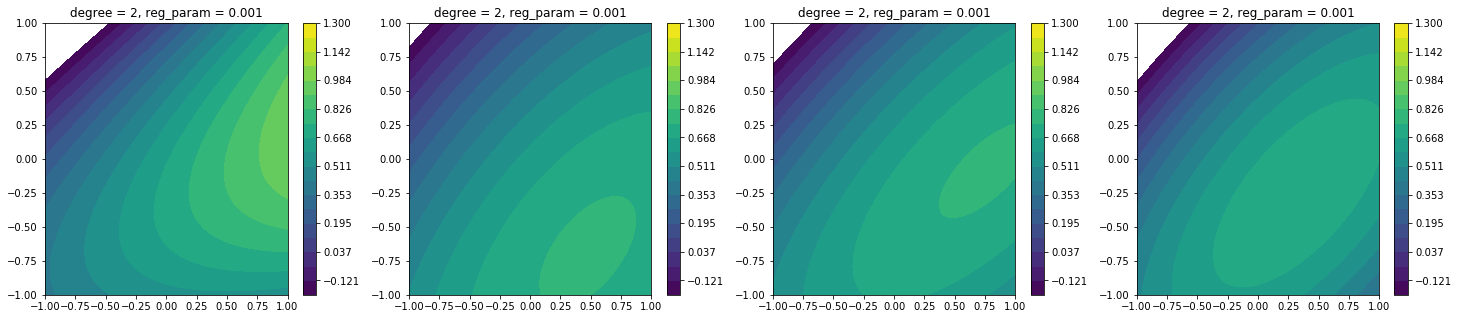

Degree= 2 lambda= 0.001
Bias = 0.18681097109608502
Variance = 0.0055806076932513535
MSE = 0.04047894661511367


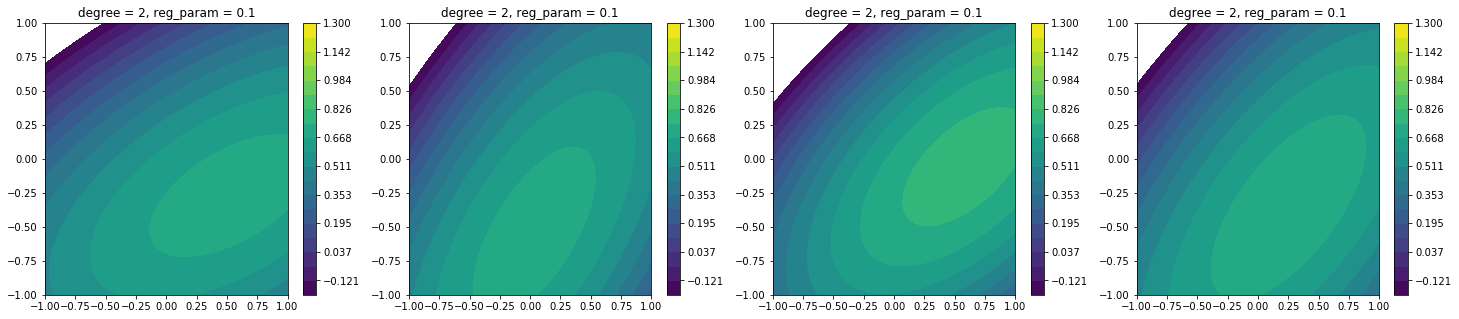

Degree= 2 lambda= 0.1
Bias = 0.18674571071239895
Variance = 0.005099518609679426
MSE = 0.03997347907915842


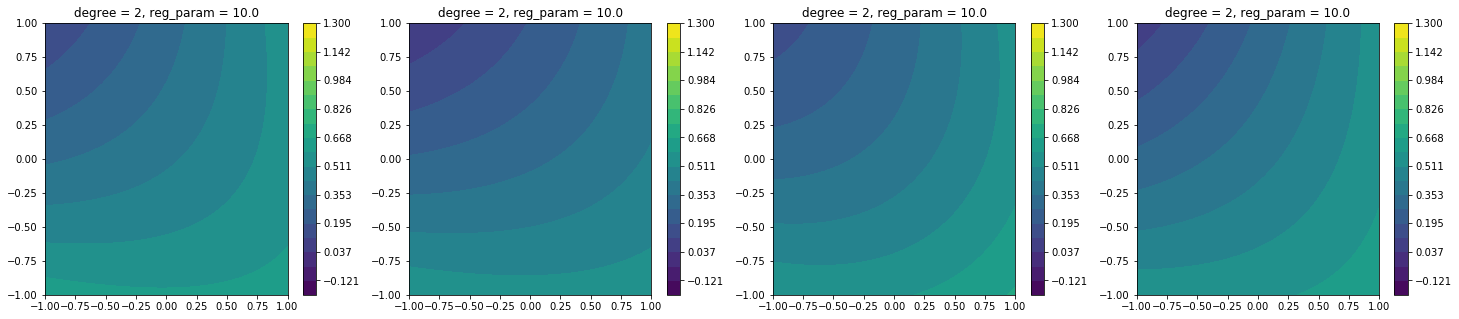

Degree= 2 lambda= 10.0
Bias = 0.24701838523424194
Variance = 0.0017720412046146566
MSE = 0.06279012384834702


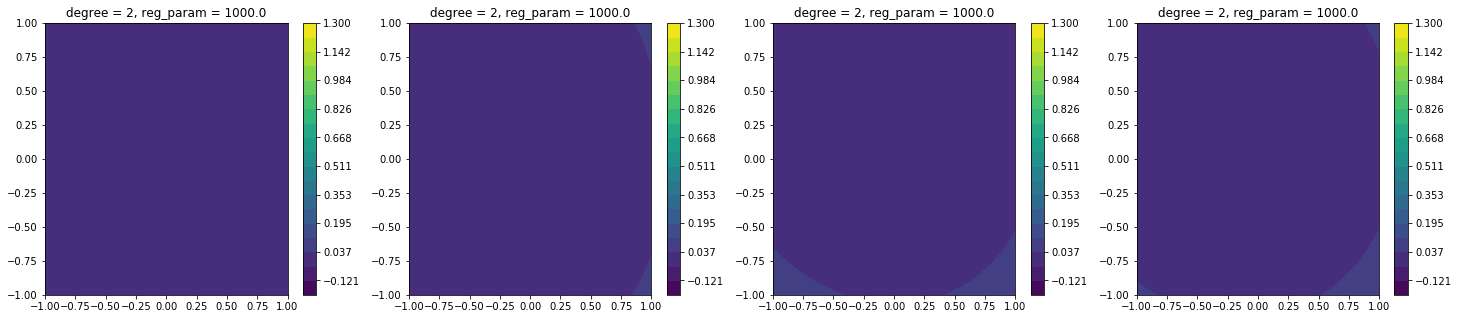

Degree= 2 lambda= 1000.0
Bias = 0.5511340578154913
Variance = 8.638164989225472e-06
MSE = 0.30375738784915857


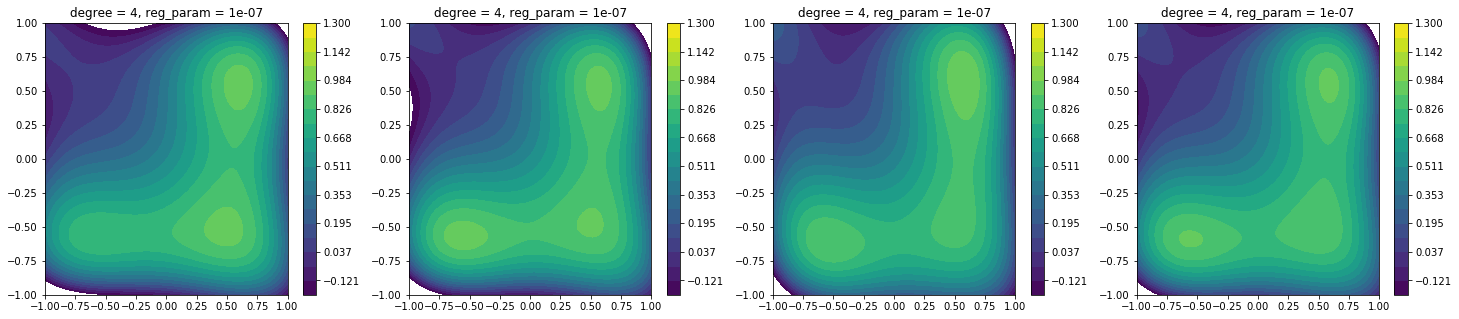

Degree= 4 lambda= 1e-07
Bias = 0.09325852285829146
Variance = 0.008075099232845832
MSE = 0.0167722513185563


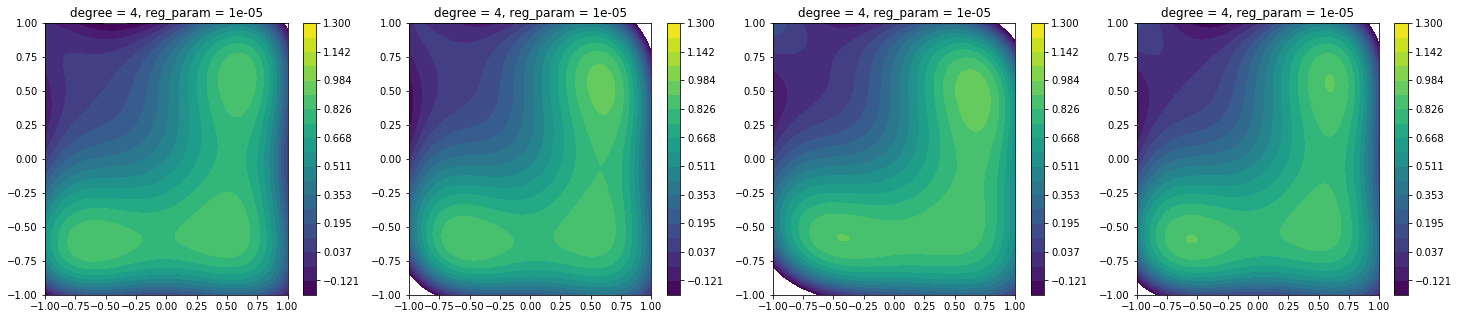

Degree= 4 lambda= 1e-05
Bias = 0.08921694413213152
Variance = 0.006756821582138275
MSE = 0.014716484702414151


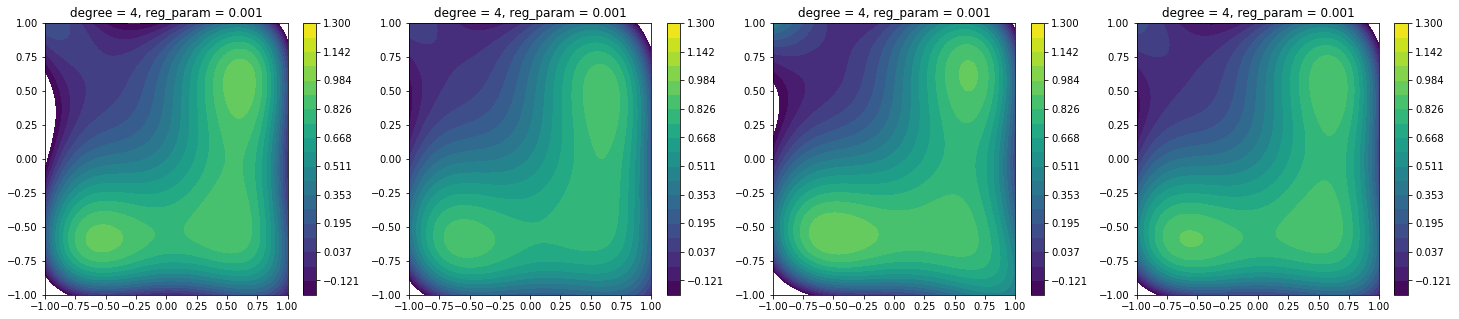

Degree= 4 lambda= 0.001
Bias = 0.09060564533044241
Variance = 0.008333454926222054
MSE = 0.016542837891967976


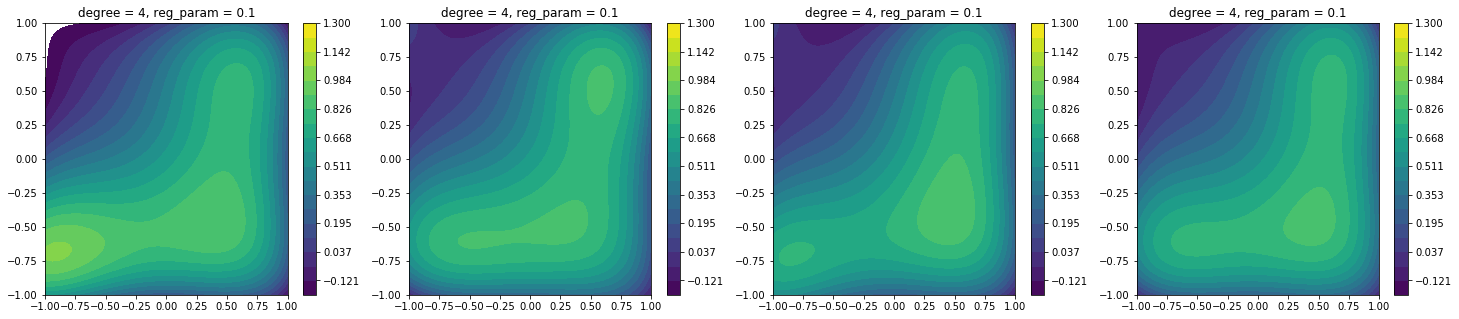

Degree= 4 lambda= 0.1
Bias = 0.09465717890585074
Variance = 0.003779717074555511
MSE = 0.012739698592969745


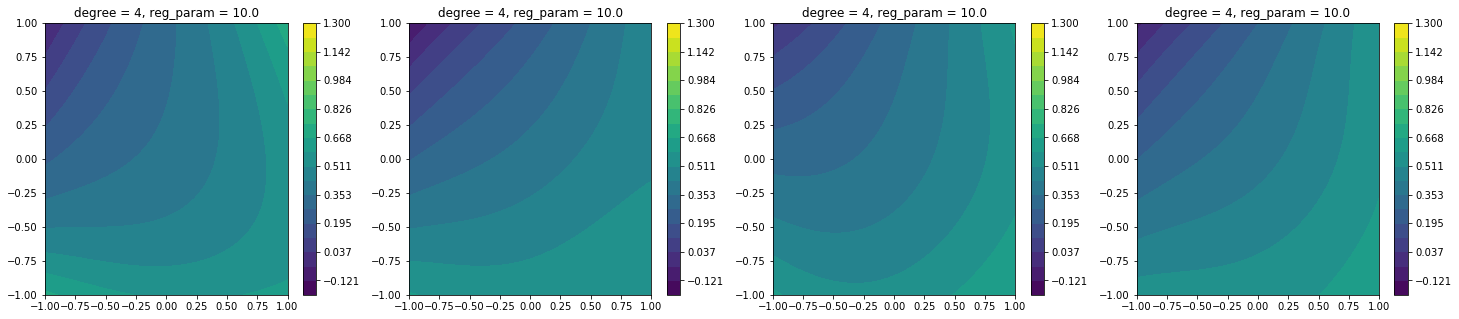

Degree= 4 lambda= 10.0
Bias = 0.24545784105051324
Variance = 0.0022837123814498823
MSE = 0.06253326411462891


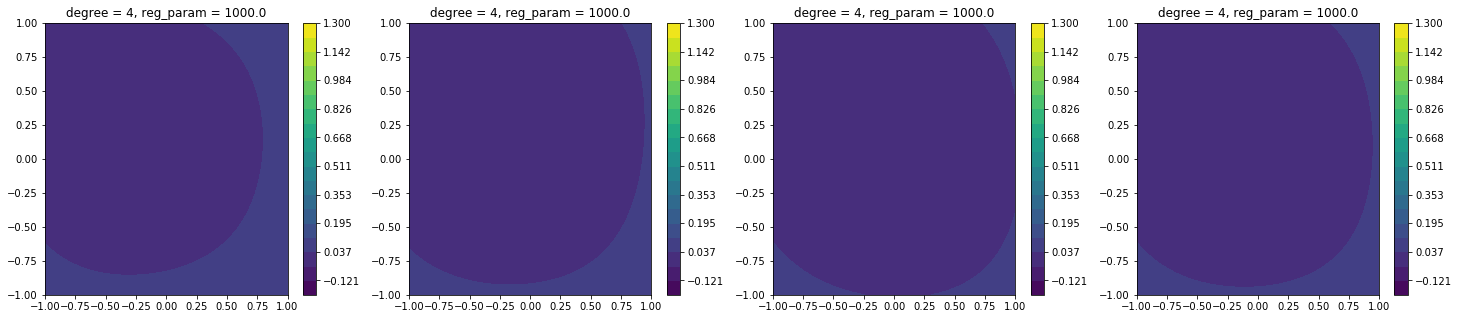

Degree= 4 lambda= 1000.0
Bias = 0.5499283703650744
Variance = 1.0260764954600068e-05
MSE = 0.302431473297341


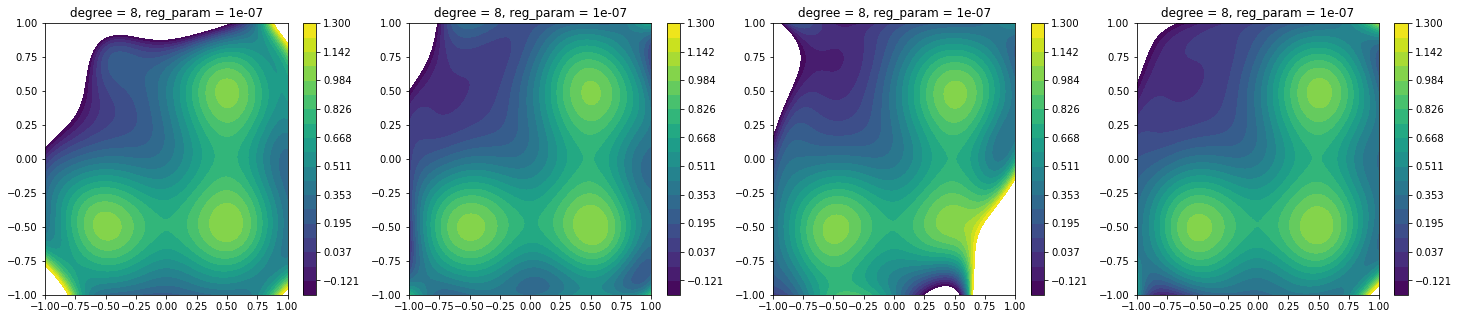

Degree= 8 lambda= 1e-07
Bias = 0.10822193949207347
Variance = 0.23067136070173674
MSE = 0.24238334888916274


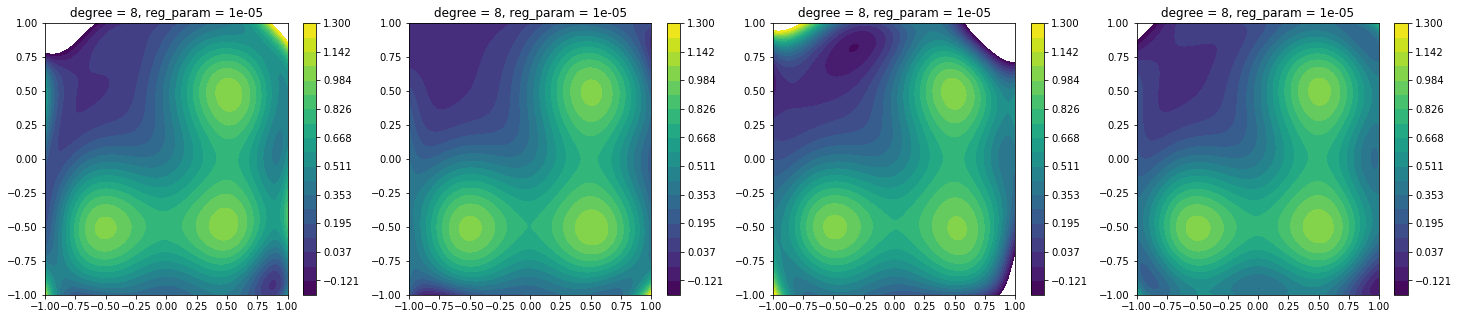

Degree= 8 lambda= 1e-05
Bias = 0.050397724883518666
Variance = 0.04187824237123365
MSE = 0.04441817304466849


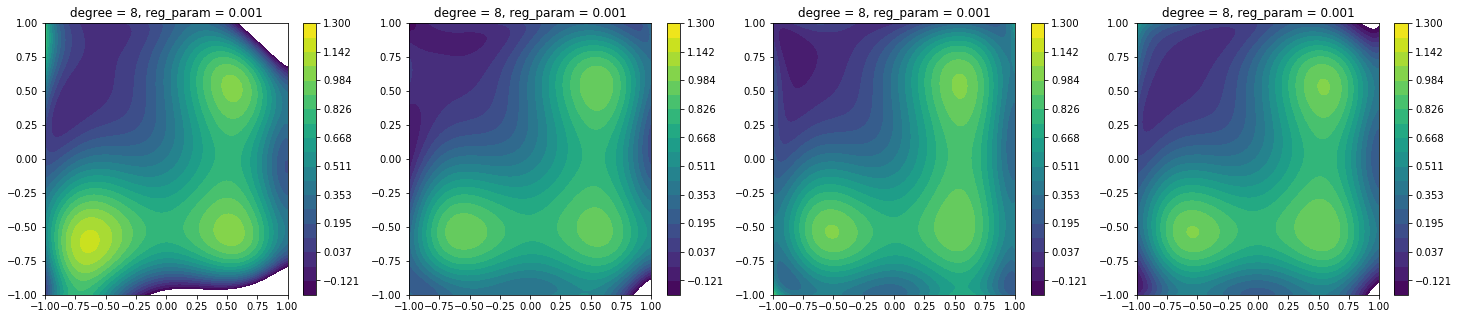

Degree= 8 lambda= 0.001
Bias = 0.07453421212112571
Variance = 0.022280947527569105
MSE = 0.02783629630408607


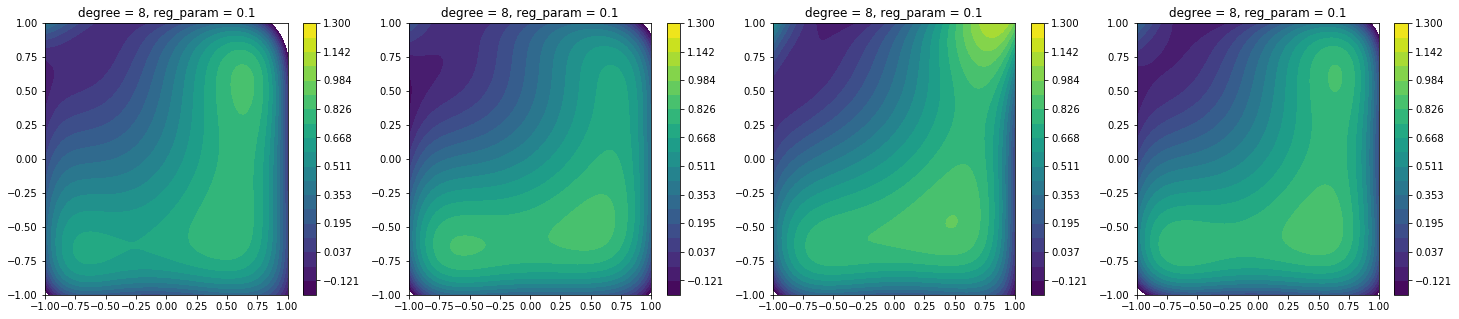

Degree= 8 lambda= 0.1
Bias = 0.0994905557955303
Variance = 0.008634859528089405
MSE = 0.018533230220592934


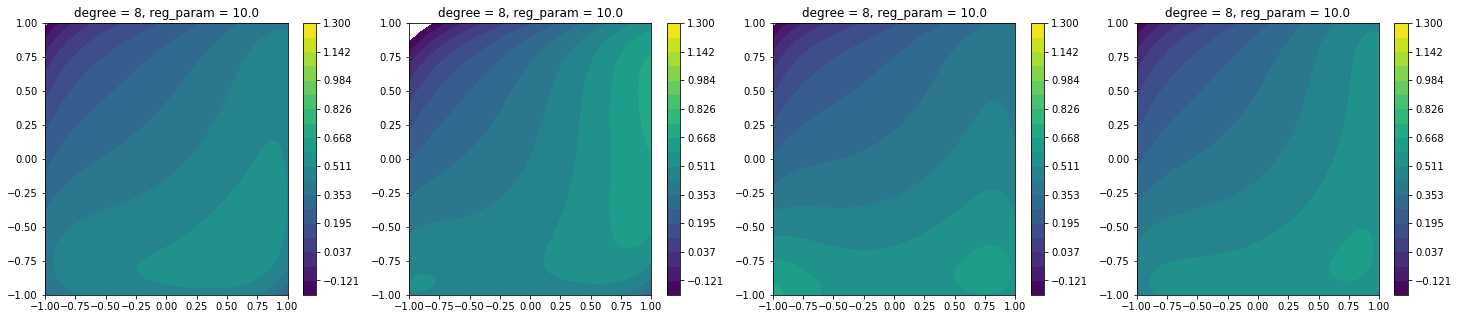

Degree= 8 lambda= 10.0
Bias = 0.237155698808098
Variance = 0.002284002405622624
MSE = 0.05852682788277993


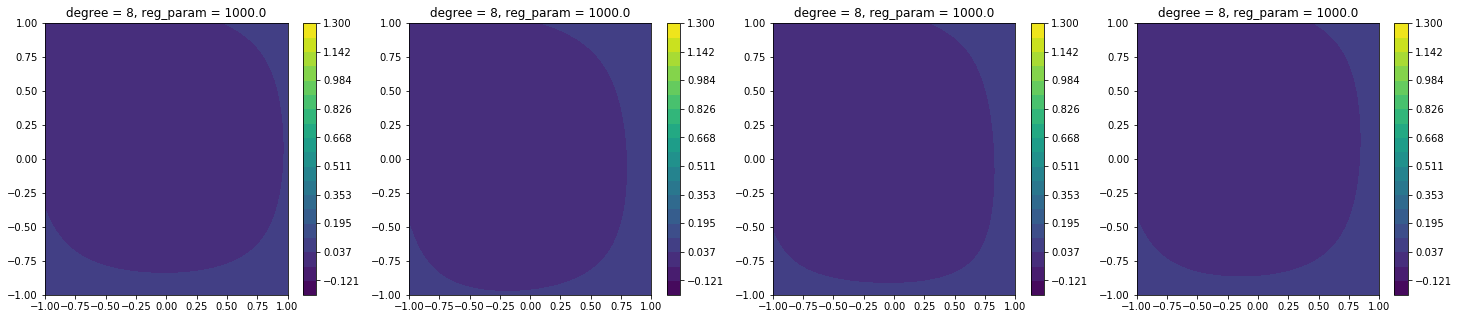

Degree= 8 lambda= 1000.0
Bias = 0.5488366728068357
Variance = 1.4232663456898854e-05
MSE = 0.30123592608113453


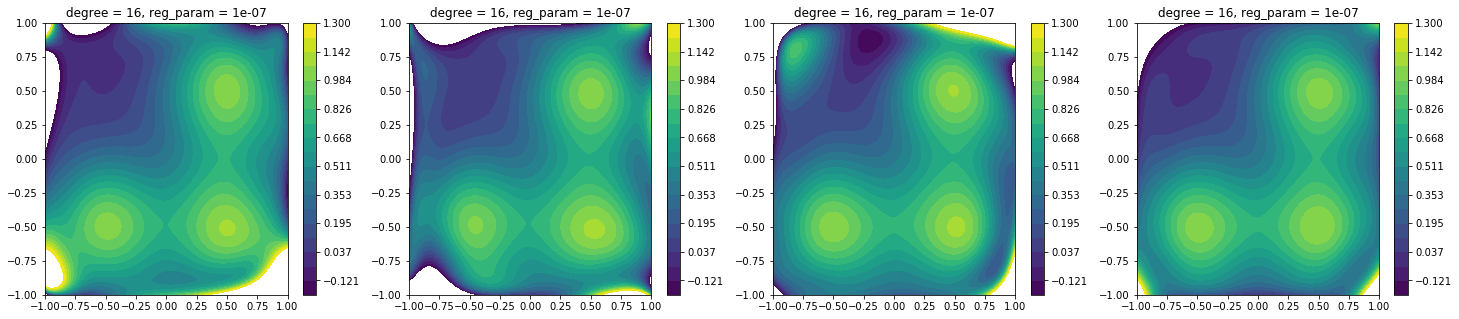

Degree= 16 lambda= 1e-07
Bias = 0.18370187784156358
Variance = 0.3720747911419426
MSE = 0.40582117106445936


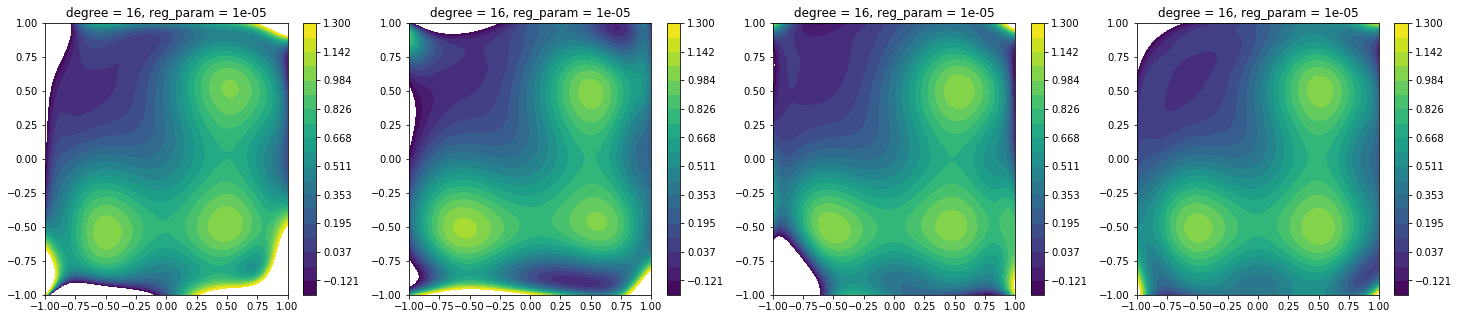

Degree= 16 lambda= 1e-05
Bias = 0.14322422578822036
Variance = 0.19098346469455293
MSE = 0.21149664354718806


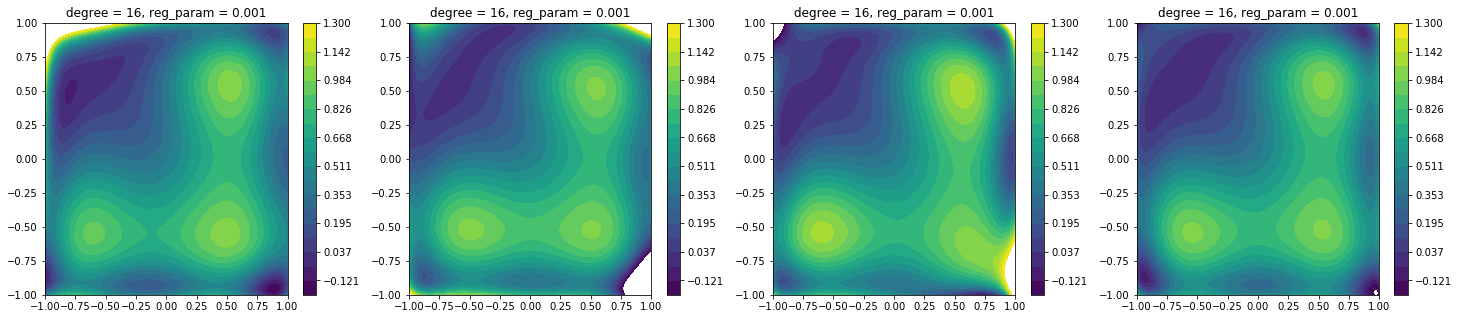

Degree= 16 lambda= 0.001
Bias = 0.07883171306518647
Variance = 0.05518555462911249
MSE = 0.06139999361390438


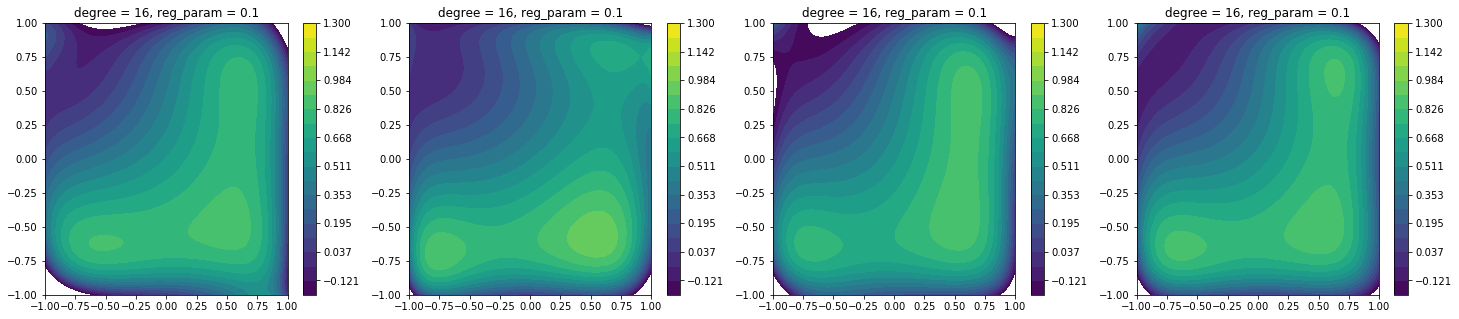

Degree= 16 lambda= 0.1
Bias = 0.11525444933679711
Variance = 0.012415211324851572
MSE = 0.025698799416779904


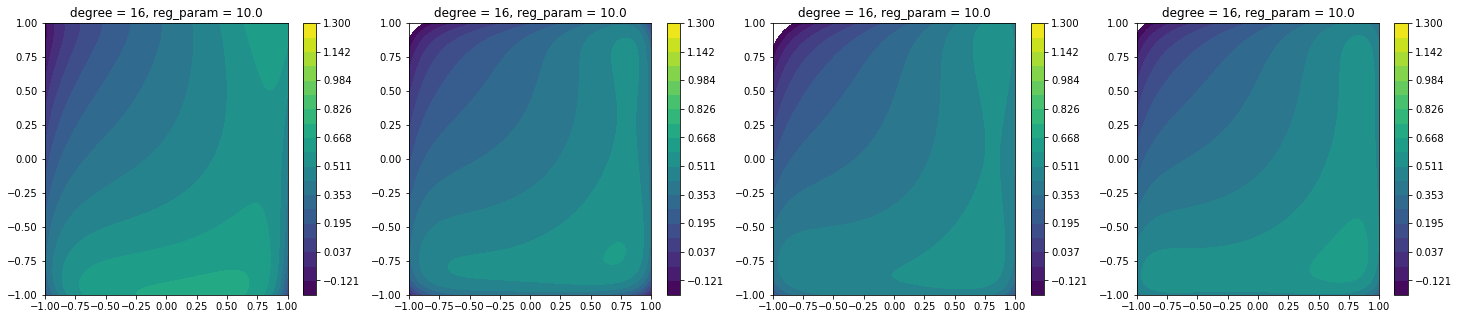

Degree= 16 lambda= 10.0
Bias = 0.22913205670715336
Variance = 0.0024994780261386744
MSE = 0.05500097743698882


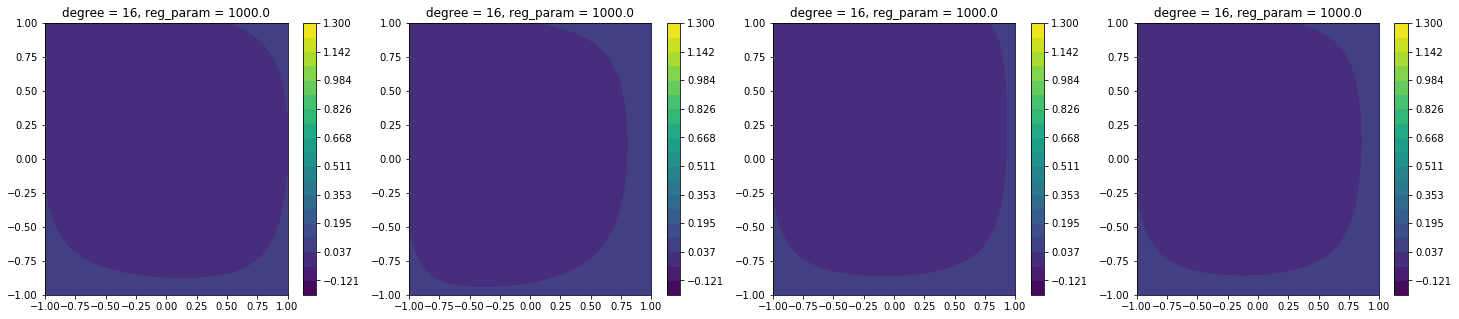

Degree= 16 lambda= 1000.0
Bias = 0.548928661128682
Variance = 1.6928566124960954e-05
MSE = 0.3013396035746523


In [9]:
# Cell type : CodeWrite
def get_yutil(X):
    a = [0.5, 0.5]
    a = np.reshape(a,(1,2))
    b = [-0.5, -0.5]
    b = np.reshape(b,(1,2))
    c = [0.5, -0.5]
    c = np.reshape(c,(1,2))
    X = np.reshape(X,(1,2))
    ans = np.exp(-4*norm(X,a)) + np.exp(-4*norm(X,b)) + np.exp(-4*norm(X,c))
    return float(ans)
    
def gen_Y(X_train):
    y = []
    n,d = X_train.shape
    for X in X_train:
        y.append(get_yutil(X))
    y = np.array(y)
    return y

def get_vector(X,degree):
    vec = []
    for i in range(0,degree+1):
        t = i+1
        p = i
        for j in range(t):
            value = (X[0]**(p-j)) * (X[1]**j)
            vec.append(value)    
    return vec
        

def get_phi(X_train,degree):
    phi = []
    for i in X_train:
        phi.append(get_vector(i,degree))    
    
    phi = np.matrix(phi)
    return phi

def polynomial_regression_ridge_pred(X_test, wt_vector, degree):
    y_pred = []
    for i in X_test:
        phi1 = get_vector(i,degree)
        phi1 = np.array(phi1)
        val = wt_vector @ phi1
        y_pred.append(val)
    
    y_pred = np.array(y_pred)
    #print(y_pred.shape)
    return y_pred
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    iters = 100
    X1 = np.linspace(-1,1,100)
    X2 = np.linspace(-1,1,100)
    sample = []
    for i in range(iters):
        for j in range(iters):
            sample.append((X1[i],X2[j]))
            
    sample = np.array(sample)
    Z = polynomial_regression_ridge_pred(sample,wt_vector, degree)
    Z = np.reshape(Z,(X.shape))

    # Get Z using other functions
    Z = Z.T
    plt.contourf(X,Y,Z,levels=np.linspace(-0.2,1.3, 20))
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    phi_mat = get_phi(X_train,degree)
    n = len(Y_train)
    check = get_inv(phi_mat @ phi_mat.T + reg_param*np.eye(n))
    
    weight = (phi_mat.T @ check) @ Y_train
    return np.array(weight)
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    iters = 100
    weight = []
    d1 = 0    
    for i in range(iters):
        X_train = np.random.uniform(low=-1,high=1,size=(num_training_samples,2))
        Y_train = gen_Y(X_train)        
        w = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        n,d = w.shape
        #print(n,d)
        d1 = d        
        weight.append(w[0])
    
    weight = np.array(weight)
    #print(weight.shape)
    gof_x = np.mean(weight,axis = 0)
    #print(gof_x.shape)
    X1 = np.linspace(-1,1,100)
    X2 = np.linspace(-1,1,100)
    sample = []
    for i in range(iters):
        for j in range(iters):
            sample.append((X1[i],X2[j]))
            
    sample = np.array(sample)
    indices = np.random.choice(np.arange(len(weight)), 3)  
  
    plt.gcf().set_size_inches(25,5)
    j = 0
    for i in indices:
        plt.subplot(1, 4, j+1)
        visualise_polynomial_2d(weight[i],degree, title=f"degree = {degree}, reg_param = {reg_param}")
        j+=1
    
    plt.subplot(1, 4, 4)
    visualise_polynomial_2d(gof_x, degree, title=f"degree = {degree}, reg_param = {reg_param}")
    plt.show()
    
    
    s1,s2 = sample.shape
    bias = 0
    variance = 0
    for i in range(s1):
        cphi = get_vector(sample[i],degree)
        gf = gof_x @ cphi
        for j in range(iters):
            ff = weight[j] @ cphi
            variance += (gf-ff)**2
            
        fstar = get_yutil(sample[i])
        bias += (gf - float(fstar))**2
        
    
    bias /= s1
    
    variance = variance/s1/iters
    mse = bias + variance
    bias_s = float(np.sqrt(bias))
    
    return bias_s,variance,mse 
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))  

    
    

        

In [10]:
# Cell type: convenience


** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

**BIAS**


    degree\𝜆      1e-7                1e-5               1e-3              1e-1             1e1              1e3          
      1      0.235133257350     0.234893710200     0.235040791872     0.234988137077     0.25492599757     0.55448583571
      2      0.186618441537     0.186363546701     0.187169534707     0.186260792913     0.24921612413     0.55117518656
      4      0.087787472853     0.087852425555     0.094358737329     0.096258424390     0.24373537373     0.54951385886
      8      0.125285348293     0.060998080550     0.067572612495     0.100502065691     0.23719386110     0.54951163170
      16     0.168263385314     0.119513149462     0.084221028521     0.108294841521     0.22919031254     0.54879055554
      
**VARIANCE**

    degree\𝜆      1e-7                1e-5               1e-3              1e-1             1e1              1e3          
      1      0.004121237193     0.003779686477     0.003432410661     0.003252805915     0.00183075359    6.839799853513e-06
      2      0.005383949181     0.005008728883     0.005327090331     0.005313308633     0.00195907628    8.606366158739e-06
      4      0.007339904399     0.009706923440     0.010864906465     0.004183641804     0.00212830267    1.085483174316e-05
      8      0.258049248780     0.043416848188     0.019377689193     0.007326710083     0.00254222659    1.334570945965e-05
      16     0.366598120305     0.173678403544     0.065627881719     0.013263860489     0.00300205435    1.956001809109e-05
      
**Observations**

      1)  For a given degree, bias decreases upto some regularisation parameter(𝜆) and then increases for higher 𝜆.
      2)  For a given degree, variances decrease as 𝜆 increases.
      3)  For a given regularisation parameter(𝜆), bias decreases when degree is increased upto some degree, then increases for higher degrees.
      4) For a given 𝜆, variance increases as degree increases.


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




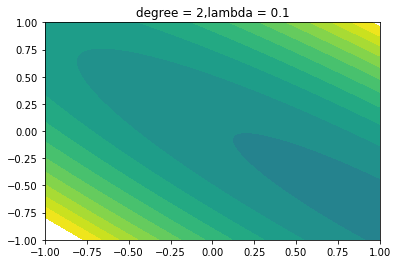

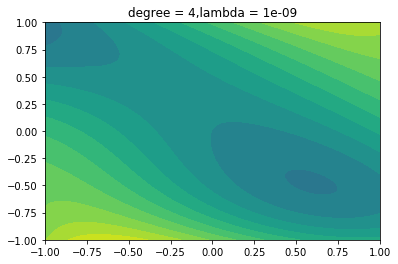

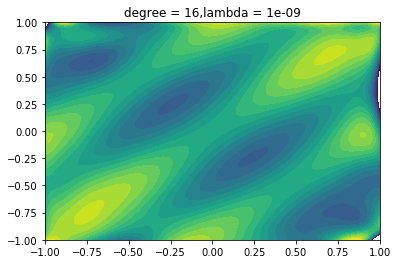

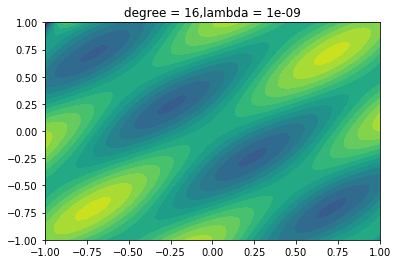

In [11]:
# Cell type : CodeWrite 
data1 = np.load('../../Data/dataset4_1.npz')
X_train = data1['arr_0']
Y_train = data1['arr_1']
X_test = data1['arr_2']
Y_test = data1['arr_3']

def visualise_contour(wt_vector, degree, title):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    iters = 100
    X1 = np.linspace(-1,1,100)
    X2 = np.linspace(-1,1,100)
    sample = []
    for i in range(iters):
        for j in range(iters):
            sample.append((X1[i],X2[j]))
            
    sample = np.array(sample)
    Z = polynomial_regression_ridge_pred(sample,wt_vector, degree)
    Z = np.reshape(Z,(X.shape))

    # Get Z using other functions
    Z = Z.T
    plt.contourf(X,Y,Z,levels=np.linspace(-2,1.3, 20))
    plt.title(title)
    plt.show()

def get_sq_error(X_train,Y_train,X_test,Y_test):
    loop = 0
    for size in [50,100,200,1000]:
        table = []
        table_train = []
        global_w = []
        for degree in [1,2,4,8,16]:
            lam = []
            g_lam = []
            g_w = []
            for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:                
                X_t = []
                Y_t = []
                X_tt = []
                Y_tt = []
                for i in range(size):
                    X_t.append(X_train[i])
                    Y_t.append(Y_train[i])
                    X_tt.append(X_test[i])
                    Y_tt.append(Y_test[i])
                
                X_t = np.array(X_t)
                Y_t = np.array(Y_t)
                X_tt = np.array(X_tt)
                Y_tt = np.array(Y_tt)
                weight = polynomial_regression_ridge_train(X_t, Y_t, degree, reg_param)
                g_w.append(weight)
                y_p = polynomial_regression_ridge_pred(X_tt, weight, degree)
                g_yp = polynomial_regression_ridge_pred(X_test, weight, degree)
                se = 0.
                for i in range(size):
                    se += (y_p[i]-Y_tt[i])**2
                
                se /= size
                
                g_se = 0.
                for i in range(len(Y_test)):
                    g_se += (g_yp[i]-Y_test[i])**2
                    
                g_se /= len(Y_test)
                lam.append(se)
                g_lam.append(float(g_se))
            
            global_w.append(g_w)
            table.append(g_lam)
            table_train.append(lam)
        table = np.array(table)
        table = np.reshape(table,(5,6))
        
        table_train = np.array(table_train)
        table_train = np.reshape(table_train,(5,6))
        
        minx = table[0][0]
        minx_train = table_train[0][0]
        
        min_ind = (0,0)
        min_ind_train = (0,0)
        for i in range(5):
            for j in range(6):
                if table[i][j]<minx:
                    minx = table[i][j]
                    min_ind = (i,j)
                if table_train[i][j]<minx_train:
                    minx_train = table_train[i][j]
                    min_ind_train = (i,j)
        
        '''print('================================')
        print('size', size)
        print('================================')'''
        k = [1,2,4,8,16]
        l = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
        
        
        visualise_contour(global_w[min_ind[0]][min_ind[1]], k[min_ind[0]], f"degree = {k[min_ind[0]]},lambda = {l[min_ind[1]]}")
        plt.show()
        
    ''' print('================================')
        print("Test error ")
        print('================================')
        print("degree = " + str(k[min_ind[0]]), "lambda = " + str(l[min_ind[1]]))
        print('================================')
        print("minimum error = ", table[min_ind[0]][min_ind[1]])
        print('================================')
        print(table)
        print('================================')
        print()
        print('================================')
        print("Train error ")
        print('================================')
        print("degree = " + str(k[min_ind_train[0]]), "lambda = " + str(l[min_ind_train[1]]))
        print('================================')
        print("minimum error = ", table_train[min_ind_train[0]][min_ind_train[1]])
        print('================================')
        print(table_train)
        print('================================')'''
                

get_sq_error(X_train,Y_train,X_test,Y_test)               
                

========================================================

**Size: 50**

========================================================================================

**Test error**

================================

**degree = 2 lambda = 0.1**

**minimum error =  0.15673525917060407**

================================


    degree\𝜆   1e-9            1e-7             1e-5              1e-3             1e-1              1e1          
      1    3.01266707e-01   3.01266817e-01   3.01266774e-01   3.01262496e-01    3.00838224e-01   2.78350694e-01
      2    1.57899956e-01   1.57899987e-01   1.57899852e-01   1.57886318e-01    1.56735259e-01   2.08223641e-01
      4    1.57334240e-01   1.57333958e-01   1.57332950e-01   1.57242781e-01    1.61826388e-01   1.96568595e-01
      8    2.37690143e+02   1.72501862e+02   1.85942539e+01   9.90250753e-01    1.65155762e-01   1.93918588e-01
      16   2.50521989e+02   2.32024824e+02   6.66976843e+01   2.33730833e+00    2.03961457e-01   1.96057322e-01

========================================

**Train error** 

========================================

**degree = 8 lambda = 0.1**

**minimum error =  0.14812674760081299**

========================================

    degree\𝜆   1e-9            1e-7          1e-5              1e-3           1e-1          1e1        
     1     0.32890188      0.32890202     0.32890197       0.32889624     0.32832797     0.29661252
     2     0.16148586      0.16148596     0.16148577       0.16146688     0.15982731     0.21282536
     4     0.15931144      0.1593115      0.15930737       0.15891165     0.15592696     0.20188838
     8     31.14211751     20.8314793     2.14654975       0.3266191      0.14812675     0.20260703
     16    42.35186069     30.258175      9.97906704       0.48778992     0.16499543     0.2075621 
    
================================

**size 100**

================================

================================

**Test error** 

================================

**degree = 4 lambda = 1e-09**

**minimum error =  0.14277573257904222**

================================

     degree\𝜆   1e-9            1e-7          1e-5              1e-3           1e-1          1e1 
      1     0.27314861      0.27314864     0.27314863      0.27314798      0.27308304     0.26862154
      2     0.15320995      0.15320993     0.1532099       0.15320678      0.15291576     0.17570948
      4     0.14277573      0.14277576     0.14277607      0.14280764      0.14602043     0.16898019
      8     0.71291511      0.71131962     0.58075914      0.20363826      0.16262758     0.17116844
      16    54.08003291     11.77041991    23.41658885     0.41784851      0.18835914     0.17415997
      
================================

**Train error** 

================================

**degree = 8 lambda = 0.1**

**minimum error =  0.14500569134327201**

================================

      degree\𝜆    1e-9            1e-7          1e-5              1e-3           1e-1          1e1 
        1      0.32256189     0.32256197     0.32256195       0.32256086      0.322452      0.31454793
        2      0.15410243     0.15410242     0.15410242       0.15410217      0.15409656    0.19388889
        3      0.1533998      0.15339991     0.1534004        0.15344945      0.1574895     0.18494745
        4      0.37165967     0.37104451     0.32039154       0.17293586      0.14500569    0.18861421
        5      20.3212392     2.78162333     1.60621201       0.18555556      0.15445249    0.19309076
        
================================

**size 200**

================================

**Test error** 

================================

**degree = 16 lambda = 1e-09**

**minimum error =  0.03714995936012385**

================================

     degree\𝜆      1e-9            1e-7          1e-5              1e-3           1e-1          1e1 
        1      0.26766326       0.26766305   0.26766305         0.26766288    0.26764571     0.26622547
        2      0.14578058       0.14578065   0.14578065         0.14578035    0.14575448     0.15868223
        3      0.13117115       0.13117097   0.1311709          0.13116415    0.13083053     0.15708512
        4      0.13736283       0.13735918   0.13698205         0.11818259    0.11396536     0.15645118
        5      0.03714996       0.8371022    0.17080666         0.0869037     0.11121403     0.15224401
        
================================

**Train error** 

================================

**degree = 16 lambda = 1e-09**

**minimum error =  0.02523408846649579**

================================

      degree\𝜆      1e-9            1e-7          1e-5              1e-3           1e-1          1e1 
        1       0.27375349       0.27375323    0.27375323        0.27375292      0.27372139    0.27103148
        2       0.1510865        0.15108664    0.15108663        0.15108519      0.15094621    0.15842228
        3       0.14785049       0.14784996    0.14784981        0.14783458      0.14671863    0.15936658
        4       0.15374531       0.15373947    0.1531227         0.12552147      0.12205791    0.16106277
        5       0.02523409       0.19627936    0.41594932        0.11328975      0.12395583    0.15882356
        
================================

**size 1000**

================================

**Test error**

================================

**degree = 16 lambda = 1e-09**

**minimum error =  0.0011976383271920168**

================================

      degree\𝜆     1e-9            1e-7          1e-5              1e-3           1e-1          1e1 
         1       0.2625351       0.26253465     0.26253465        0.26253465     0.2625346    0.2625303 
         2       0.14242912      0.14242932     0.14242932        0.14242945     0.14244207   0.14451885
         3       0.1270796       0.12707963     0.12707964        0.12708121     0.12724209   0.14093659
         4       0.08481321      0.08481261     0.08480025        0.08391324     0.09782269   0.13498892
         5       0.00119764      0.00149006     0.01095719        0.04965813     0.0907374    0.1278209 
         
================================

================================

**Train error**

================================

**degree = 16 lambda = 1e-09**

**minimum error =  0.001219537236246343**

================================

       degree\𝜆       1e-9            1e-7          1e-5              1e-3           1e-1          1e1 
          1        0.25612211     0.25612169    0.25612169       0.25612168      0.25612136    0.25609075
          2        0.14173184     0.14173208    0.14173208       0.14173211      0.14173584    0.14302793
          3        0.12898317     0.12898334    0.12898336       0.12898433      0.12908753    0.14070664
          4        0.08637379     0.08637349    0.08635347       0.08483721      0.09692853    0.13526323
          5        0.00121954     0.00279756    0.00995567       0.05230602      0.09290708    0.12820799
          
=================================

**Squared Error (Test data)**

     Size     Degree      regularisation parameter(𝜆)               test Squared error
      50        2                  0.1                             0.15673525917060407
      100       8                 1e-09                            0.14277573257904222
      200       16                1e-09                            0.03714995936012385
     1000       16                1e-09                            0.0011976383271920168

**Observations**

          1) As the training set size increases, polynomial with higher degree and low regularisation parameter(𝜆) gives the minimum squared error.
        2) As the training size increases, minimum square error decreases.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












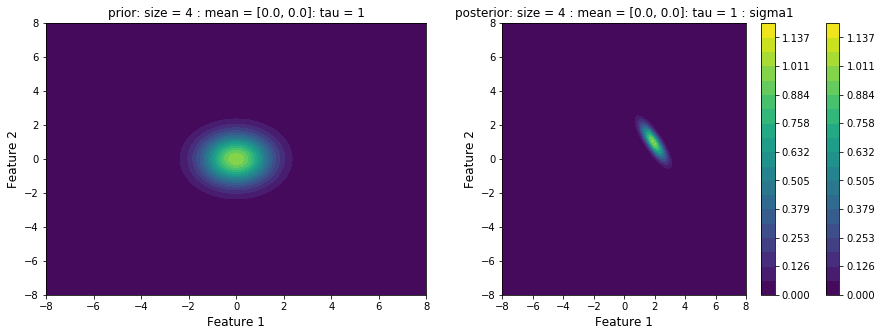

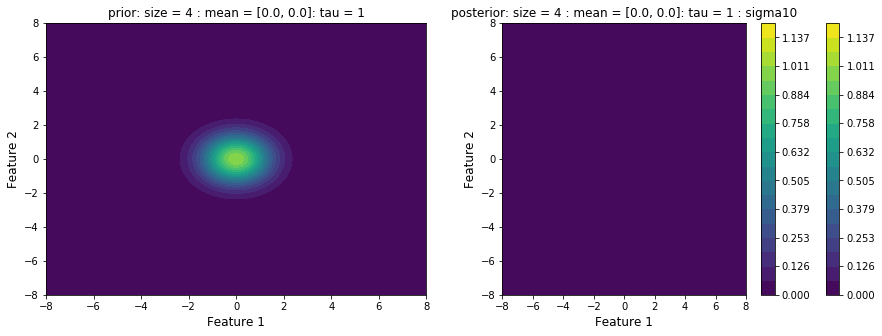

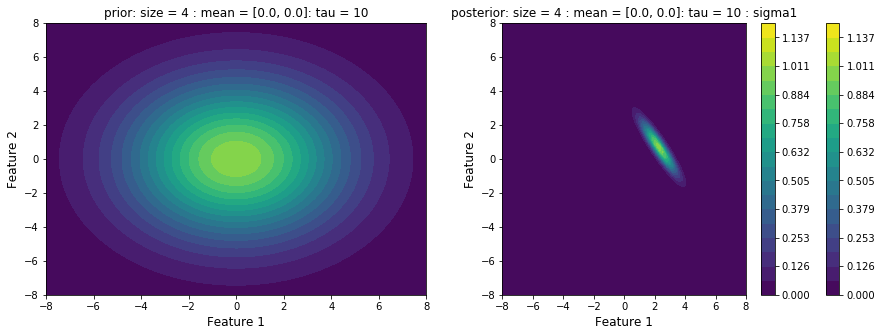

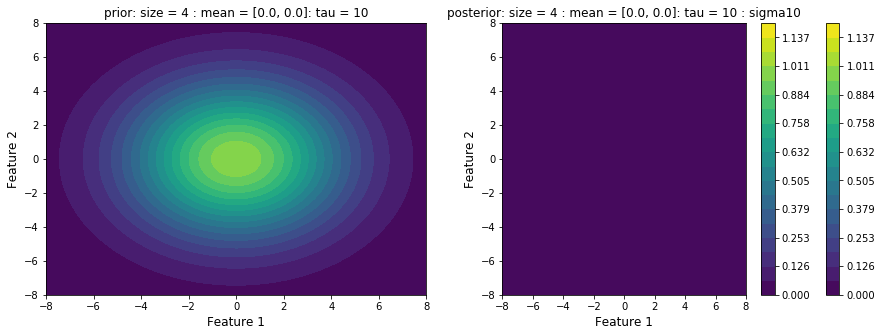

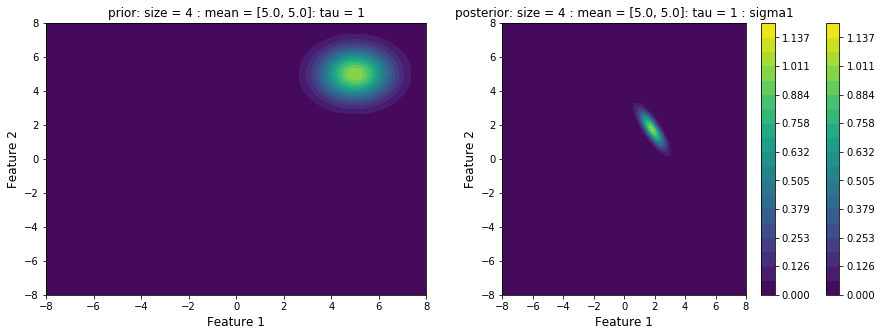

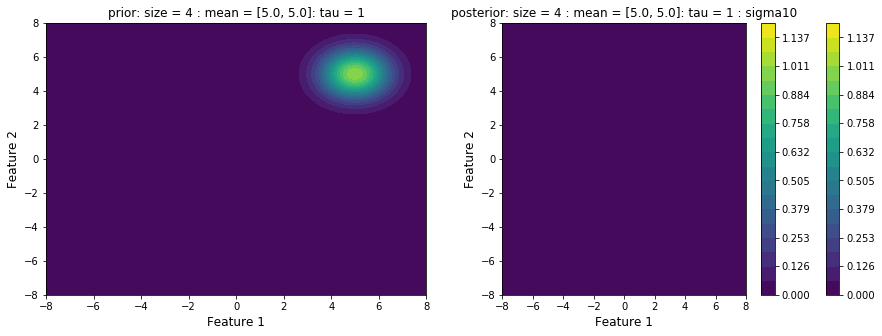

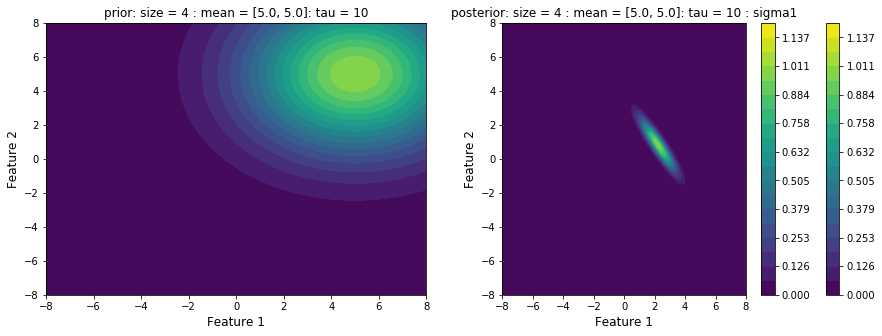

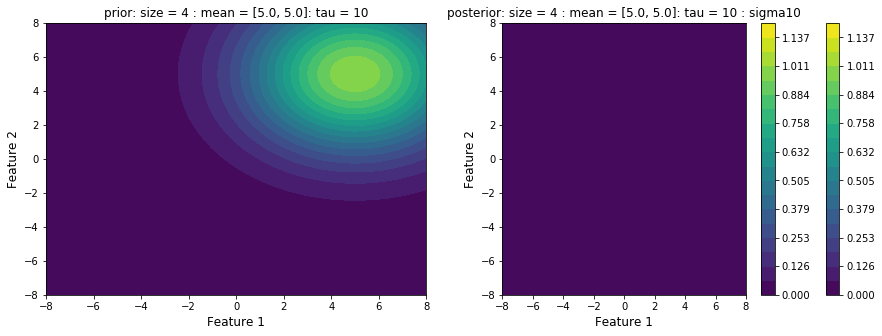

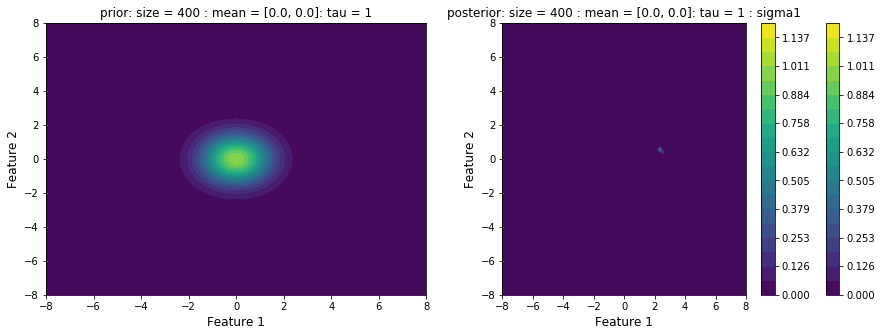

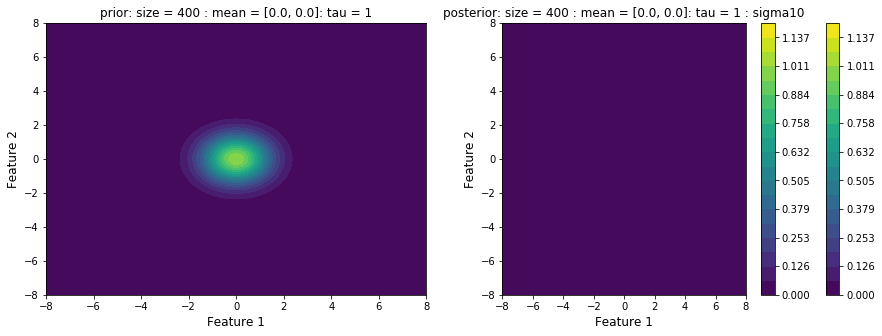

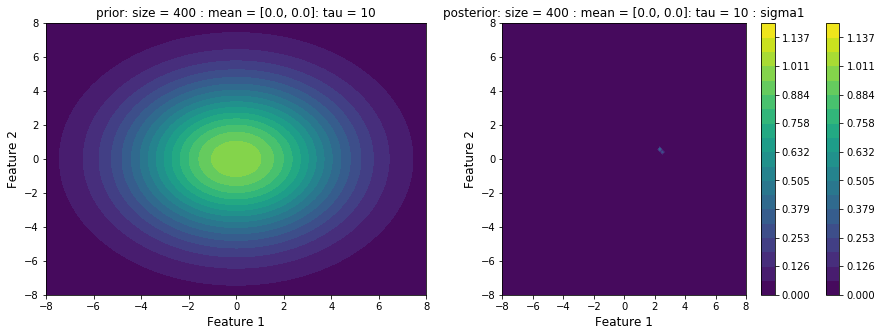

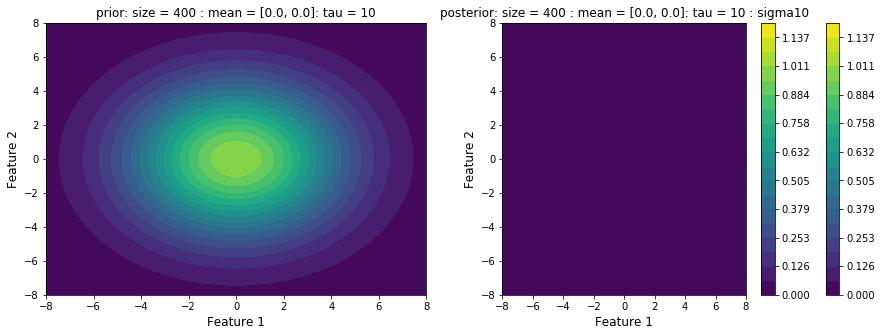

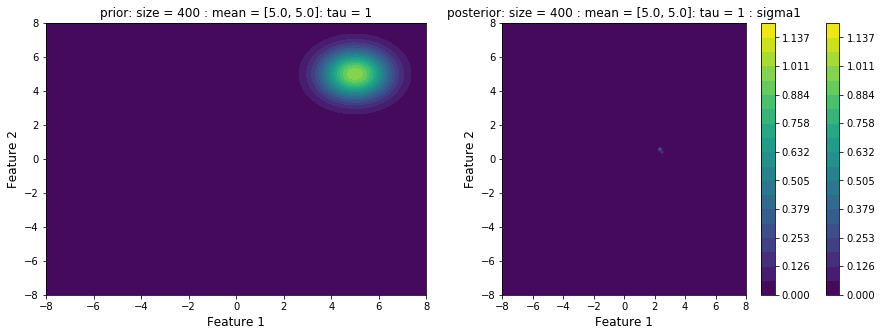

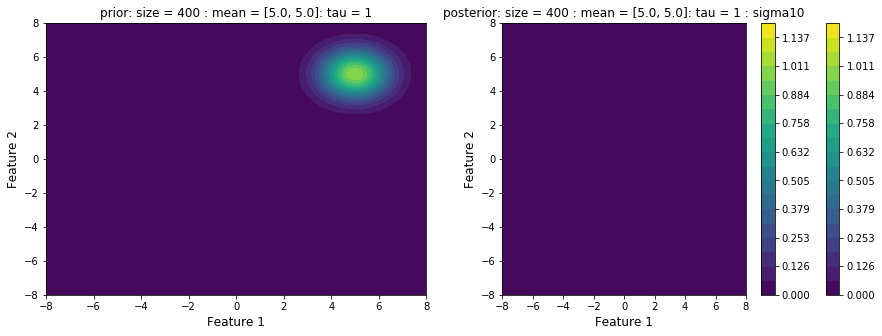

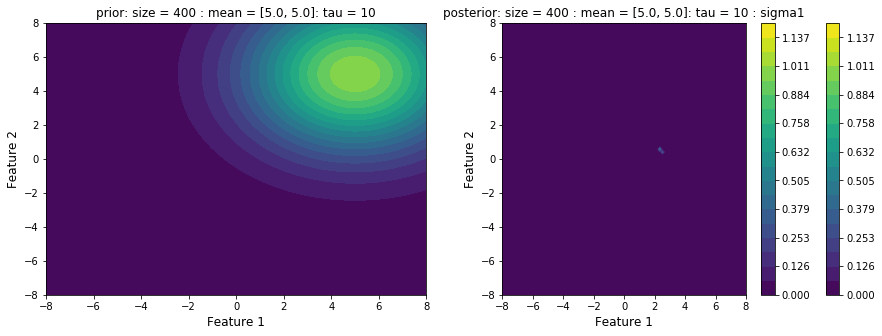

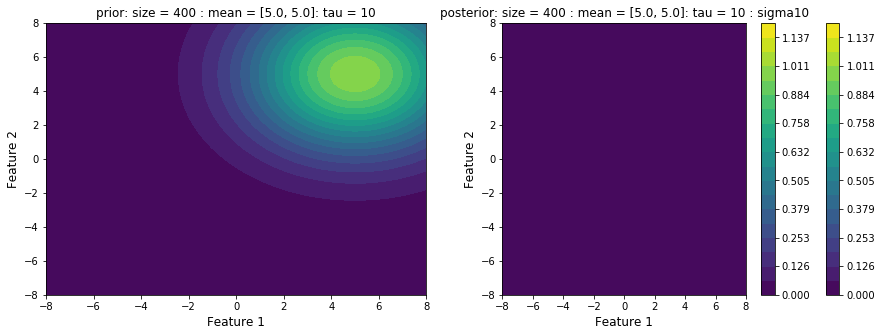

In [12]:
# Cell type : CodeWrite 
def predict(X,mu,tau_sq_I):
    X = X.reshape((len(X),1))
    mu = mu.reshape((len(mu),1))
    n = X-mu 
    
    inv = get_inv(tau_sq_I)    
    ans = (n.T @ inv) @ n
    ans = -0.5 * ans
    return float(np.exp(ans))
    

def plot_contour(mu, tau_sq_I, tau, title,ax,fig):  
 
    mu = np.array(mu)
    mu.reshape(len(mu),1)    
    X,Y = np.meshgrid(np.linspace(-8,8,100), np.linspace(-8,8,100))
    iters = 100
    X1 = np.linspace(-8,8,100)
    X2 = np.linspace(-8,8,100)
    sample = []
    for i in range(iters):
        for j in range(iters):
            sample.append((X1[i],X2[j]))
            
    sample = np.array(sample)
    Z = []
    for i in sample:
        Z.append(predict(i,mu,tau_sq_I))
    Z = np.array(Z)
    Z = np.reshape(Z,(X.shape))
    img = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2, 20))
    ax.set_title(title)
    ax.set_xlabel("Feature 1",fontsize=12)
    ax.set_ylabel("Feature 2",fontsize=12)
    fig.colorbar(img)
    
def pred(X,weight):
    return (weight.T @ X)

def prior(mu,tau,ax,fig,size):
    plot_contour(mu, tau * np.eye(len(mu)), tau, f"prior: size = {size} : mean = {mu}: tau = {tau}",ax,fig)
    

def new_cov(tau_sq_I, sig, X):
    z = get_inv(tau_sq_I) + (1/sig) *(X.T@X)    
    return get_inv(z)

def new_mu(cov1, cov2, mu1, sig, X, y):
    mu1 = np.array(mu1)
    mu1 = np.reshape(mu1,(len(mu1),1))
    z1 = get_inv(cov1)@mu1 
    z2 = sig*(X.T@y)
    z = z1.reshape(len(z1),1) + z2
    ans = cov2 @ z    
    return ans
    
def posterior(X,Y, mu,tau, sig, tau_sq_I,ax,fig,size):
    cov1 = new_cov(tau_sq_I, sig, X)
    mu1 = new_mu(tau_sq_I, cov1, mu, sig, X,Y)
    plot_contour(mu1, cov1, tau, f"posterior: size = {size} : mean = {mu}: tau = {tau} : sigma{sig}",ax, fig)

X = [[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]]
Y = [[5.1],[6.1],[4.2],[2.9]]

def final_func(X,Y):
    X_train = []
    Y_train = []
    for i in X:
        j = 0
        for j in range(100):
            X_train.append(i)
        
    for i in Y:
        j = 0
        for j in range(100):
            Y_train.append(i)
        
    X = np.array(X)        
    Y = np.array(Y)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    for data_set in [[X,Y], [X_train, Y_train]]:
        for mu in [[0.0, 0.0],[5.0, 5.0]]:
            for tau in [1,10]:
                for sigma in [1,10]:
                    X1 = data_set[0]                    
                    Y1 = data_set[1]
                    #print(X1)
                    #print(Y1)
                    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
                    prior(mu,tau,ax1,fig, len(data_set[0]))                    
                    posterior(X1,Y1,mu,tau,sigma, tau * np.eye(len(mu)),ax2,fig,len(data_set[0]))
                    plt.show()

final_func(X,Y)

** Cell type : TextWrite **

**Observations**

     1) Distribution of prior is circle centred at its mean whereas distribution of posterior is ellipse centred at its mean.
     2) Stretch of ellipse depicts the variance of posterior. As variation increases, its stretch increases.
     3) Feature1 and Feature2 are negatively correlated.
     4) As Data set size increases, variance and covariance decreases.
     5) For a given tau as sigma decreases, ellipse becomes more sharp.
     6) For a given sigma, as tau increases ,ellipse become more sharp